In [1]:
# Import librairie 
import pandas as pd
import nltk
import html
from collections import Counter
from html.parser import HTMLParser
import datetime
import re
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

In [4]:
# Charger les données 
#stack = pd.read_csv("../Data/Stack1.csv",sep = ',', low_memory=False)
#df_stack = pd.DataFrame(stack)

In [5]:
# Charger les données
stack_20181203 = pd.read_csv("../Data/Q20181203.csv",sep = ',', low_memory=False)

In [6]:
# Charger les données
#stack_20181202 = pd.read_csv("../Data/Q20181202.csv",sep = ',', low_memory=False)

In [7]:
# Charger les données
#stack_20181201 = pd.read_csv("../Data/Q20181201.csv",sep = ',', low_memory=False)

In [8]:
# Charger les données
#stack_20181103 = pd.read_csv("../Data/Q20181103.csv",sep = ',', low_memory=False)

frames = [stack_20190101,
         stack_20181203,
         stack_20181202,
         stack_20181201,
         stack_20181103,
         stack_20181102,
         stack_20181101,
         stack_20181003,
         stack_20181002,
         stack_20181001,
         stack_20180902,
         stack_20180901]

In [9]:
frames = [stack_20181203]

In [10]:
df_stack = pd.concat(frames)

In [11]:
df_stack.shape

(41587, 22)

In [12]:
df_stack.head()

Id  PostTypeId  AcceptedAnswerId  ParentId         CreationDate  \
0  53886792           1               NaN       NaN  2018-12-21 14:53:20   
1  53886796           1        53986829.0       NaN  2018-12-21 14:53:31   
2  53886800           1               NaN       NaN  2018-12-21 14:53:38   
3  53886802           1        53887005.0       NaN  2018-12-21 14:53:47   
4  53886803           1               NaN       NaN  2018-12-21 14:53:53   

   DeletionDate  Score  ViewCount  \
0           NaN      0         40   
1           NaN      0         19   
2           NaN      0         23   
3           NaN      0         38   
4           NaN     -1         86   

                                                Body  OwnerUserId  \
0  <p>According to <a href="https://stackoverflow...    3336423.0   
1  <p>I'm writing tests for a rest API. I'm using...   10512595.0   
2  <p>I've tried many different ways to have two ...    9727963.0   
3  <p>I have the following array of arrays:</p>\n...     513449.0   
4  <p>I am learning javascript at the moment and ...   10820661.0   

          ...         LastEditorDisplayName         LastEditDate  \
0         ...                           NaN                  NaN   
1         ...                           NaN                  NaN   
2         ...                           NaN                  NaN   
3         ...                           NaN  2018-12-21 15:42:14   
4         ...                           NaN  2018-12-21 15:29:07   

      LastActivityDate                                              Title  \
0  2018-12-21 14:54:59  Can I use enable_if to have two functions with...   
1  2018-12-31 11:18:36      Unexpected element: CDATA soapUI maven plugin   
2  2018-12-21 15:23:54                             Sticky-top on two rows   
3  2018-12-21 21:50:07  How to converting an array to a dictionary in ...   
4  2018-12-21 15:29:07                           How do i loop a function   

                                                Tags AnswerCount CommentCount  \
0                        <c++><templates><enable-if>           0            3   
1                        <json><rest><maven><soapui>           1            0   
2                     <html><css><twitter-bootstrap>           1            0   
3  <javascript><data-structures><javascript-objects>           3            2   
4                                       <javascript>           5            1   

   FavoriteCount           ClosedDate  CommunityOwnedDate  
0            NaN  2018-12-21 14:56:05                 NaN  
1            NaN                  NaN                 NaN  
2            NaN                  NaN                 NaN  
3            NaN                  NaN                 NaN  
4            NaN                  NaN                 NaN  

[5 rows x 22 columns]

In [13]:
#stack_tags = pd.read_csv("../Data/ListAllTags.csv", low_memory=False)
stack_tagsinf10 = pd.read_csv("../Data/ListTagInf10.csv", low_memory=False)
stack_tagssup10 = pd.read_csv("../Data/ListTagSup10.csv", low_memory=False)
df_tags = pd.concat([stack_tagsinf10,stack_tagssup10])

In [14]:
df_tags.head()


Id   TagName  Count  ExcerptPostId  WikiPostId
0   46   alt.net      9     25220551.0  25220550.0
1  210  metacity      9     25220570.0  25220569.0
2  268   colemak      9     12367861.0  12367860.0
3  347   rockbox      5     14662652.0  14662651.0
4  394      xfdl      9     18903095.0  18903094.0

In [15]:
seuil = df_tags.Count.quantile(0.99)

In [16]:
print('seuil',seuil)

seuil 11939.139999999985


In [17]:
df_tags.shape

(54123, 5)

In [18]:
# On ne garde que les tags les "plus" utilisés
df_tags_keep = df_tags.loc[df_tags.Count > seuil]

In [19]:
df_tags_keep.shape

(542, 5)

In [20]:
df_tags[df_tags.Count > seuil].shape

(542, 5)

In [21]:
df_tags_keep.to_csv("tag_stack.csv",sep =";")

In [22]:
#On élimine les données (BODY ou TITLE) nulles
df_stack2=df_stack.loc[pd.notnull(df_stack.Body)]
df_stack2=df_stack.loc[pd.notnull(df_stack.Title)]
df_stack2.reset_index(drop = True,inplace=True)

In [23]:
class MyHTMLParser(HTMLParser):
    def __init__(self):
        HTMLParser.__init__(self)
        self.data = []
        ls_data = []
        
   
    def handle_data(self, data):
        self.data.append(data)

In [24]:
def commentaire (ligne_html):
    parser = MyHTMLParser()
    parser.feed(ligne_html)
    #return(parser.data[0])
    return(str(parser.data).replace('\\n',' '))

In [25]:
df_stack2['commentaire1'] = df_stack2.apply(lambda row: commentaire(row['Body']), axis=1)

In [26]:
# test fonction commentaire pour ne garder que la première ligne HTLM du body
commentaire(df_stack2.Body[7])

'[\'I have a error in api 23 when i run my app:\', \'  \', \'"NetworkScheduler: Invalid component specified"\', \'  \', "I don\'t have this error api 28-24", \'  \', \'whats the problem?\', \' \']'

In [27]:
df_stack2.head()

Id  PostTypeId  AcceptedAnswerId  ParentId         CreationDate  \
0  53886792           1               NaN       NaN  2018-12-21 14:53:20   
1  53886796           1        53986829.0       NaN  2018-12-21 14:53:31   
2  53886800           1               NaN       NaN  2018-12-21 14:53:38   
3  53886802           1        53887005.0       NaN  2018-12-21 14:53:47   
4  53886803           1               NaN       NaN  2018-12-21 14:53:53   

   DeletionDate  Score  ViewCount  \
0           NaN      0         40   
1           NaN      0         19   
2           NaN      0         23   
3           NaN      0         38   
4           NaN     -1         86   

                                                Body  OwnerUserId  \
0  <p>According to <a href="https://stackoverflow...    3336423.0   
1  <p>I'm writing tests for a rest API. I'm using...   10512595.0   
2  <p>I've tried many different ways to have two ...    9727963.0   
3  <p>I have the following array of arrays:</p>\n...     513449.0   
4  <p>I am learning javascript at the moment and ...   10820661.0   

                         ...                                 LastEditDate  \
0                        ...                                          NaN   
1                        ...                                          NaN   
2                        ...                                          NaN   
3                        ...                          2018-12-21 15:42:14   
4                        ...                          2018-12-21 15:29:07   

      LastActivityDate                                              Title  \
0  2018-12-21 14:54:59  Can I use enable_if to have two functions with...   
1  2018-12-31 11:18:36      Unexpected element: CDATA soapUI maven plugin   
2  2018-12-21 15:23:54                             Sticky-top on two rows   
3  2018-12-21 21:50:07  How to converting an array to a dictionary in ...   
4  2018-12-21 15:29:07                           How do i loop a function   

                                                Tags AnswerCount CommentCount  \
0                        <c++><templates><enable-if>           0            3   
1                        <json><rest><maven><soapui>           1            0   
2                     <html><css><twitter-bootstrap>           1            0   
3  <javascript><data-structures><javascript-objects>           3            2   
4                                       <javascript>           5            1   

  FavoriteCount           ClosedDate  CommunityOwnedDate  \
0           NaN  2018-12-21 14:56:05                 NaN   
1           NaN                  NaN                 NaN   
2           NaN                  NaN                 NaN   
3           NaN                  NaN                 NaN   
4           NaN                  NaN                 NaN   

                                        commentaire1  
0  ['According to ', 'this post', ', enable_if ca...  
1  ["I'm writing tests for a rest API. I'm using ...  
2  ["I've tried many different ways to have two r...  
3  ['I have the following array of arrays:', '  '...  
4  ["I am learning javascript at the moment and i...  

[5 rows x 23 columns]

In [28]:
df_stack2[df_stack2.Title == 'Passing the search term from SearchHandler to ContentPage in Xamarin Forms 4']

Id  PostTypeId  AcceptedAnswerId  ParentId         CreationDate  \
19038  53925855           1               NaN       NaN  2018-12-25 21:56:26   

       DeletionDate  Score  ViewCount  \
19038           NaN      0         35   

                                                    Body  OwnerUserId  \
19038  <p>I'm trying to make use of the new SearchHan...    2529475.0   

                             ...                         LastEditDate  \
19038                        ...                                  NaN   

          LastActivityDate                                              Title  \
19038  2019-01-06 20:40:35  Passing the search term from SearchHandler to ...   

                                   Tags AnswerCount CommentCount  \
19038  <xamarin.forms><xamarin-forms-4>           1            2   

      FavoriteCount  ClosedDate  CommunityOwnedDate  \
19038           NaN         NaN                 NaN   

                                            commentaire1  
19038  ["I'm trying to make use of the new SearchHand...  

[1 rows x 23 columns]

In [29]:
# On ajoute le titre aux commentaires et on passe en minuscule
df_stack2['titre_commentaire'] = df_stack2['Title'].str.lower() + ' ' + df_stack2['commentaire1'].str.lower()

In [30]:
df_stack2.head()


Id  PostTypeId  AcceptedAnswerId  ParentId         CreationDate  \
0  53886792           1               NaN       NaN  2018-12-21 14:53:20   
1  53886796           1        53986829.0       NaN  2018-12-21 14:53:31   
2  53886800           1               NaN       NaN  2018-12-21 14:53:38   
3  53886802           1        53887005.0       NaN  2018-12-21 14:53:47   
4  53886803           1               NaN       NaN  2018-12-21 14:53:53   

   DeletionDate  Score  ViewCount  \
0           NaN      0         40   
1           NaN      0         19   
2           NaN      0         23   
3           NaN      0         38   
4           NaN     -1         86   

                                                Body  OwnerUserId  \
0  <p>According to <a href="https://stackoverflow...    3336423.0   
1  <p>I'm writing tests for a rest API. I'm using...   10512595.0   
2  <p>I've tried many different ways to have two ...    9727963.0   
3  <p>I have the following array of arrays:</p>\n...     513449.0   
4  <p>I am learning javascript at the moment and ...   10820661.0   

                         ...                             LastActivityDate  \
0                        ...                          2018-12-21 14:54:59   
1                        ...                          2018-12-31 11:18:36   
2                        ...                          2018-12-21 15:23:54   
3                        ...                          2018-12-21 21:50:07   
4                        ...                          2018-12-21 15:29:07   

                                               Title  \
0  Can I use enable_if to have two functions with...   
1      Unexpected element: CDATA soapUI maven plugin   
2                             Sticky-top on two rows   
3  How to converting an array to a dictionary in ...   
4                           How do i loop a function   

                                                Tags AnswerCount CommentCount  \
0                        <c++><templates><enable-if>           0            3   
1                        <json><rest><maven><soapui>           1            0   
2                     <html><css><twitter-bootstrap>           1            0   
3  <javascript><data-structures><javascript-objects>           3            2   
4                                       <javascript>           5            1   

  FavoriteCount           ClosedDate  CommunityOwnedDate  \
0           NaN  2018-12-21 14:56:05                 NaN   
1           NaN                  NaN                 NaN   
2           NaN                  NaN                 NaN   
3           NaN                  NaN                 NaN   
4           NaN                  NaN                 NaN   

                                        commentaire1  \
0  ['According to ', 'this post', ', enable_if ca...   
1  ["I'm writing tests for a rest API. I'm using ...   
2  ["I've tried many different ways to have two r...   
3  ['I have the following array of arrays:', '  '...   
4  ["I am learning javascript at the moment and i...   

                                   titre_commentaire  
0  can i use enable_if to have two functions with...  
1  unexpected element: cdata soapui maven plugin ...  
2  sticky-top on two rows ["i've tried many diffe...  
3  how to converting an array to a dictionary in ...  
4  how do i loop a function ["i am learning javas...  

[5 rows x 24 columns]

# On essai d'enlever les mots les plus fréquemments utilisés dans le texte

In [31]:
# fonction qui créé une liste à partir d'une colonne multi valeur
def recup_liste(x):
    liste = []
    for i in range (x.shape[0]):
        if not(pd.isnull(x[i])):
            for v_liste in nltk.word_tokenize(x[i]):
                liste.append(v_liste)
    liste.sort()
    return liste

In [32]:
print(datetime.datetime.now())
liste_commentaire =recup_liste(df_stack2.titre_commentaire)
print(datetime.datetime.now())

2019-05-27 10:05:52.138334
2019-05-27 10:07:29.326505


In [33]:
liste_group = Counter(liste_commentaire) 

In [34]:
df_counter = pd.DataFrame.from_dict(liste_group, orient='index').reset_index()

In [35]:
df_counter.head()

index      0
0     !  21577
1     #  40425
2     $  73161
3     %  23555
4     &  18747

In [36]:
df_counter.rename(columns={'index':'mot', 0:'nb'}, inplace = True)

In [37]:
df_counter.shape

(590670, 2)

In [38]:
seuil = df_counter.nb.quantile(0.999)

In [39]:
print('Seuil',seuil)

Seuil 1566.0


In [40]:
df_counter_q = df_counter.loc[df_counter.nb > seuil]

In [41]:
df_counter_q[df_counter_q.mot == "python"]

mot    nb
456637  python  4946

In [42]:
# Cela pose un problème car on ne souhaite pas enlever le mot "python" qui est bien caratéristique des tags
# On ne peut pas se baser sur cette technique pour enlever les stopwords (prendre les mots dont l'apparition est > x%)

In [43]:
liste_stop_words = nltk.corpus.stopwords.words('english')

In [44]:
pd.DataFrame(liste_stop_words).to_csv("stop_words.csv",sep =";")

In [45]:
'python' in liste_stop_words

False

In [46]:
# On enlève les stop words
print(datetime.datetime.now())
df_stack2['titre_commentaire_nettoyé'] = df_stack2['titre_commentaire'].apply(lambda x: ' '.join(k for k in nltk.word_tokenize(x) if k not in liste_stop_words))
print(datetime.datetime.now())

2019-05-27 10:07:31.594453
2019-05-27 10:09:27.267040


In [47]:
df_stack2['titre_commentaire_nettoyé'].head()

0    use enable_if two functions name , arguments d...
1    unexpected element : cdata soapui maven plugin...
2    sticky-top two rows [ `` 've tried many differ...
3    converting array dictionary javascript ( also ...
4    loop function [ `` learning javascript moment ...
Name: titre_commentaire_nettoyé, dtype: object

In [48]:
# On ne va conserver que les caractères alphanumériques
print(datetime.datetime.now())
df_stack2['titre_commentaire_alpha'] = df_stack2['titre_commentaire_nettoyé'].apply(lambda x: ' '.join(k for k in nltk.word_tokenize(x) if k.isalpha()))
print(datetime.datetime.now())

2019-05-27 10:09:27.280687
2019-05-27 10:11:04.916458


In [49]:
df_stack2['titre_commentaire_alpha'].head()

0    use two functions name arguments different ret...
1    unexpected element cdata soapui maven plugin w...
2    two rows tried many different ways two rows be...
3    converting array dictionary javascript also co...
4    loop function learning javascript moment want ...
Name: titre_commentaire_alpha, dtype: object

In [50]:
ps = nltk.stem.PorterStemmer()

In [51]:
# On essaie la lemmatization pour ne conserver que les racines des mots
print(datetime.datetime.now())
df_stack2['titre_commentaire_stem'] = df_stack2['titre_commentaire_alpha'].apply(lambda x: ' '.join(ps.stem(x) for x in nltk.word_tokenize(x)))
print(datetime.datetime.now())

2019-05-27 10:11:04.934472
2019-05-27 10:12:28.867824


In [52]:
df_stack2['titre_commentaire_stem'].head(10)

0    use two function name argument differ return t...
1    unexpect element cdata soapui maven plugin wri...
2    two row tri mani differ way two row becom ca s...
3    convert array dictionari javascript also colum...
4    loop function learn javascript moment want ask...
5    statist superior ttest matlab two vector valu ...
6    use spring data repositori static method defin...
7    api networkschedul invalid compon specifi erro...
8    find first element array place begin follow ar...
9    formula pull valu base multipl criteria say ta...
Name: titre_commentaire_stem, dtype: object

In [53]:
df_stack2[['titre_commentaire','titre_commentaire_alpha','titre_commentaire_stem']].head(20)

titre_commentaire  \
0   can i use enable_if to have two functions with...   
1   unexpected element: cdata soapui maven plugin ...   
2   sticky-top on two rows ["i've tried many diffe...   
3   how to converting an array to a dictionary in ...   
4   how do i loop a function ["i am learning javas...   
5   statistical superiority with ttest matlab ['gi...   
6   using spring data repositories in static metho...   
7   api 23: networkscheduler: invalid component sp...   
8   find first element in array and place it at th...   
9   can an if/and + index/match formula pull value...   
10  simplefunge - nilclass error even when top of ...   
11  how to blur a container or any widget in flutt...   
12  preventing premature session fixture teardown ...   
13  open sorting dialogue via vba in excel ['in ex...   
14  saving entity with pagingandsortingrepository....   
15  comparison of words among two dataframe ['i ha...   
16  how to update one record column to true, all e...   
17  logstash : filter column values in a log ['i a...   
18  count every distinct values from mongodb then ...   
19  location of printstacktrace() log when applica...   

                              titre_commentaire_alpha  \
0   use two functions name arguments different ret...   
1   unexpected element cdata soapui maven plugin w...   
2   two rows tried many different ways two rows be...   
3   converting array dictionary javascript also co...   
4   loop function learning javascript moment want ...   
5   statistical superiority ttest matlab two vecto...   
6   using spring data repositories static methods ...   
7   api networkscheduler invalid component specifi...   
8   find first element array place beginning follo...   
9   formula pull values based multiple criteria sa...   
10  simplefunge nilclass error even top stack null...   
11  blur container widget flutter trying achieve b...   
12  preventing premature session fixture teardown ...   
13  open sorting dialogue via vba excel excel via ...   
14  saving entity produces postcreate events child...   
15  comparison words among two dataframe two wante...   
16  update one record column true else false tryin...   
17  logstash filter column values log using logsta...   
18  count every distinct values mongodb render amc...   
19  location printstacktrace log application start...   

                               titre_commentaire_stem  
0   use two function name argument differ return t...  
1   unexpect element cdata soapui maven plugin wri...  
2   two row tri mani differ way two row becom ca s...  
3   convert array dictionari javascript also colum...  
4   loop function learn javascript moment want ask...  
5   statist superior ttest matlab two vector valu ...  
6   use spring data repositori static method defin...  
7   api networkschedul invalid compon specifi erro...  
8   find first element array place begin follow ar...  
9   formula pull valu base multipl criteria say ta...  
10  simplefung nilclass error even top stack null ...  
11  blur contain widget flutter tri achiev blur ef...  
12  prevent prematur session fixtur teardown rerun...  
13  open sort dialogu via vba excel excel via vba ...  
14  save entiti produc postcreat event child colle...  
15  comparison word among two datafram two want co...  
16  updat one record column true els fals tri upda...  
17  logstash filter column valu log use logstash p...  
18  count everi distinct valu mongodb render amcha...  
19  locat printstacktrac log applic start server s...

In [54]:
df_stack2['titre_commentaire_alpha'][0]

'use two functions name arguments different return type post used define two functions name arguments different return type include template typename typename typename std std value type double float template typename typename typename std std value type something else int main int argc argv auto float auto int return get error reporting defined twice error redefinition class class note class class previously declared function main int error matching function call note candidate note template class class note template argument failed error type named std false void warning unused variable instantiation float void required warning return statement function returning supposed work wrong'

In [55]:
df_stack2['titre_commentaire_stem'][0]

'use two function name argument differ return type post use defin two function name argument differ return type includ templat typenam typenam typenam std std valu type doubl float templat typenam typenam typenam std std valu type someth els int main int argc argv auto float auto int return get error report defin twice error redefinit class class note class class previous declar function main int error match function call note candid note templat class class note templat argument fail error type name std fals void warn unus variabl instanti float void requir warn return statement function return suppos work wrong'

In [56]:
# En ligne 8, on perd l'information c++, on n'utilise pas le Stem

In [57]:
df_stack2.head()

Id  PostTypeId  AcceptedAnswerId  ParentId         CreationDate  \
0  53886792           1               NaN       NaN  2018-12-21 14:53:20   
1  53886796           1        53986829.0       NaN  2018-12-21 14:53:31   
2  53886800           1               NaN       NaN  2018-12-21 14:53:38   
3  53886802           1        53887005.0       NaN  2018-12-21 14:53:47   
4  53886803           1               NaN       NaN  2018-12-21 14:53:53   

   DeletionDate  Score  ViewCount  \
0           NaN      0         40   
1           NaN      0         19   
2           NaN      0         23   
3           NaN      0         38   
4           NaN     -1         86   

                                                Body  OwnerUserId  \
0  <p>According to <a href="https://stackoverflow...    3336423.0   
1  <p>I'm writing tests for a rest API. I'm using...   10512595.0   
2  <p>I've tried many different ways to have two ...    9727963.0   
3  <p>I have the following array of arrays:</p>\n...     513449.0   
4  <p>I am learning javascript at the moment and ...   10820661.0   

                         ...                         AnswerCount  \
0                        ...                                   0   
1                        ...                                   1   
2                        ...                                   1   
3                        ...                                   3   
4                        ...                                   5   

   CommentCount FavoriteCount           ClosedDate CommunityOwnedDate  \
0             3           NaN  2018-12-21 14:56:05                NaN   
1             0           NaN                  NaN                NaN   
2             0           NaN                  NaN                NaN   
3             2           NaN                  NaN                NaN   
4             1           NaN                  NaN                NaN   

                                        commentaire1  \
0  ['According to ', 'this post', ', enable_if ca...   
1  ["I'm writing tests for a rest API. I'm using ...   
2  ["I've tried many different ways to have two r...   
3  ['I have the following array of arrays:', '  '...   
4  ["I am learning javascript at the moment and i...   

                                   titre_commentaire  \
0  can i use enable_if to have two functions with...   
1  unexpected element: cdata soapui maven plugin ...   
2  sticky-top on two rows ["i've tried many diffe...   
3  how to converting an array to a dictionary in ...   
4  how do i loop a function ["i am learning javas...   

                           titre_commentaire_nettoyé  \
0  use enable_if two functions name , arguments d...   
1  unexpected element : cdata soapui maven plugin...   
2  sticky-top two rows [ `` 've tried many differ...   
3  converting array dictionary javascript ( also ...   
4  loop function [ `` learning javascript moment ...   

                             titre_commentaire_alpha  \
0  use two functions name arguments different ret...   
1  unexpected element cdata soapui maven plugin w...   
2  two rows tried many different ways two rows be...   
3  converting array dictionary javascript also co...   
4  loop function learning javascript moment want ...   

                              titre_commentaire_stem  
0  use two function name argument differ return t...  
1  unexpect element cdata soapui maven plugin wri...  
2  two row tri mani differ way two row becom ca s...  
3  convert array dictionari javascript also colum...  
4  loop function learn javascript moment want ask...  

[5 rows x 27 columns]

In [58]:
df_stack_travail = df_stack2[['Title','commentaire1','Tags','titre_commentaire_alpha']]

In [59]:
df_stack_travail.rename(columns={'titre_commentaire_alpha': 'Commentaire'}, inplace=True)

In [60]:
lst_tags = df_tags_keep['TagName'].values.tolist()

In [61]:
df_stack_travail['Commentaire'][0]

'use two functions name arguments different return type post used define two functions name arguments different return type include template typename typename typename std std value type double float template typename typename typename std std value type something else int main int argc argv auto float auto int return get error reporting defined twice error redefinition class class note class class previously declared function main int error matching function call note candidate note template class class note template argument failed error type named std false void warning unused variable instantiation float void required warning return statement function returning supposed work wrong'

In [62]:
set(df_stack_travail['Commentaire'][0].split(' '))

{'argc',
 'argument',
 'arguments',
 'argv',
 'auto',
 'call',
 'candidate',
 'class',
 'declared',
 'define',
 'defined',
 'different',
 'double',
 'else',
 'error',
 'failed',
 'false',
 'float',
 'function',
 'functions',
 'get',
 'include',
 'instantiation',
 'int',
 'main',
 'matching',
 'name',
 'named',
 'note',
 'post',
 'previously',
 'redefinition',
 'reporting',
 'required',
 'return',
 'returning',
 'something',
 'statement',
 'std',
 'supposed',
 'template',
 'twice',
 'two',
 'type',
 'typename',
 'unused',
 'use',
 'used',
 'value',
 'variable',
 'void',
 'warning',
 'work',
 'wrong'}

In [63]:
print(datetime.datetime.now())
df_stack_travail['tags_auto'] = df_stack_travail['Commentaire'].apply(lambda x: ' '.join(k for k in set(x.split(' ')) if k in lst_tags))
print(datetime.datetime.now())

2019-05-27 10:12:29.444821
2019-05-27 10:12:43.021719


In [64]:
df_stack_travail.head()

Title  \
0  Can I use enable_if to have two functions with...   
1      Unexpected element: CDATA soapUI maven plugin   
2                             Sticky-top on two rows   
3  How to converting an array to a dictionary in ...   
4                           How do i loop a function   

                                        commentaire1  \
0  ['According to ', 'this post', ', enable_if ca...   
1  ["I'm writing tests for a rest API. I'm using ...   
2  ["I've tried many different ways to have two r...   
3  ['I have the following array of arrays:', '  '...   
4  ["I am learning javascript at the moment and i...   

                                                Tags  \
0                        <c++><templates><enable-if>   
1                        <json><rest><maven><soapui>   
2                     <html><css><twitter-bootstrap>   
3  <javascript><data-structures><javascript-objects>   
4                                       <javascript>   

                                         Commentaire  \
0  use two functions name arguments different ret...   
1  unexpected element cdata soapui maven plugin w...   
2  two rows tried many different ways two rows be...   
3  converting array dictionary javascript also co...   
4  loop function learning javascript moment want ...   

                                    tags_auto  
0                     get function class post  
1  api maven properties time rest groovy path  
2                        html flex https view  
3    arrays time object dictionary javascript  
4                get function html javascript

In [65]:
df_stack_travail['tags_reel'] = df_stack_travail.Tags.apply(lambda x : x.replace('><',' '))

In [66]:
df_stack_travail['tags_reel'] = df_stack_travail.tags_reel.apply(lambda x : x.replace('<',''))

In [67]:
df_stack_travail['tags_reel'] = df_stack_travail.tags_reel.apply(lambda x : x.replace('>',''))

In [68]:
print(datetime.datetime.now())
df_stack_travail['tags_reel_stack'] = df_stack_travail['tags_reel'].apply(lambda x: ' '.join(k for k in set(x.split(' ')) if k in lst_tags))
print(datetime.datetime.now())

2019-05-27 10:12:43.928532
2019-05-27 10:12:44.755704


In [69]:
df_stack_travail.head()

Title  \
0  Can I use enable_if to have two functions with...   
1      Unexpected element: CDATA soapUI maven plugin   
2                             Sticky-top on two rows   
3  How to converting an array to a dictionary in ...   
4                           How do i loop a function   

                                        commentaire1  \
0  ['According to ', 'this post', ', enable_if ca...   
1  ["I'm writing tests for a rest API. I'm using ...   
2  ["I've tried many different ways to have two r...   
3  ['I have the following array of arrays:', '  '...   
4  ["I am learning javascript at the moment and i...   

                                                Tags  \
0                        <c++><templates><enable-if>   
1                        <json><rest><maven><soapui>   
2                     <html><css><twitter-bootstrap>   
3  <javascript><data-structures><javascript-objects>   
4                                       <javascript>   

                                         Commentaire  \
0  use two functions name arguments different ret...   
1  unexpected element cdata soapui maven plugin w...   
2  two rows tried many different ways two rows be...   
3  converting array dictionary javascript also co...   
4  loop function learning javascript moment want ...   

                                    tags_auto  \
0                     get function class post   
1  api maven properties time rest groovy path   
2                        html flex https view   
3    arrays time object dictionary javascript   
4                get function html javascript   

                                       tags_reel             tags_reel_stack  
0                        c++ templates enable-if               c++ templates  
1                         json rest maven soapui             rest maven json  
2                     html css twitter-bootstrap  twitter-bootstrap css html  
3  javascript data-structures javascript-objects  javascript data-structures  
4                                     javascript                  javascript

In [70]:
def compte_mots(x,y):
    i = 0
    for v_liste in x.split():
        if v_liste in y.split():
            i+=1
    return i

In [71]:
df_stack_travail['nb_tags_reel_stack']=df_stack_travail['tags_reel_stack'].apply(lambda x: len(x.split()))

In [72]:
df_stack_travail['nb_tags_auto_dans_reel']=df_stack_travail.apply(lambda row: compte_mots(row['tags_auto'],row['tags_reel_stack']), axis=1)

In [73]:
df_stack_travail.Title.head()



0    Can I use enable_if to have two functions with...
1        Unexpected element: CDATA soapUI maven plugin
2                               Sticky-top on two rows
3    How to converting an array to a dictionary in ...
4                             How do i loop a function
Name: Title, dtype: object

In [74]:
df_stack_travail.commentaire1[1]

'["I\'m writing tests for a rest API. I\'m using property and property transfer. ", \'  \', \'When I run my TestCase using SoapUI, everything goes fine. However, when I run it using maven and the com.smartbear.soapui:soapui-maven-plugin:4.6.1 I got this error:\', \'  \', \'Status: FAILED Time Taken: 64 Size: 0 Timestamp: Fri Dec 21 14:15:12 GMT+01:00 2018 TestStep: Property Transfer 1 Error:com.eviware.soapui.impl.wsdl.teststeps.PropertyTransferException: error: Unexpected element: CDATA  ----------------- Messages ------------------------------ Error performing transfer [city] - error: Unexpected element: CDATA ---------------------------------------------------- city transferred [[error: Unexpected element: CDATA]] from [Personal_data.city] to [eligibility.Request] ------------ target path ------------- $..city \', \'  \', "I\'m thinking of using a Groovy script to do my properties transfers but first, I would realy like to understand why I have this error and if there is a way to fi

In [75]:
df_stack_travail.Commentaire[1]

'unexpected element cdata soapui maven plugin writing tests rest api using property property transfer run testcase using soapui everything goes fine however run using maven got error failed time taken size timestamp fri dec teststep property transfer error error unexpected element cdata messages error performing transfer city error unexpected element cdata city transferred error unexpected element cdata target path thinking using groovy script properties transfers first would realy like understand error way fix involve groovy script'

In [76]:
import gensim, logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [77]:
class MySentence(object):
    def __init__(self,df):
        self.df = df
        
    def __iter__(self):
        for v in self.df.tags_auto:
            if len(v) >1:
                yield v.split()

In [78]:
sentence = MySentence(df_stack_travail)

In [79]:
model = gensim.models.Word2Vec(sentence,min_count=1, size=150)


2019-05-27 10:12:46,530 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2019-05-27 10:12:46,531 : INFO : collecting all words and their counts
2019-05-27 10:12:46,532 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-05-27 10:12:46,548 : INFO : PROGRESS: at sentence #10000, processed 53643 words, keeping 370 word types
2019-05-27 10:12:46,564 : INFO : PROGRESS: at sentence #20000, processed 107145 words, keeping 370 word types
2019-05-27 10:12:46,581 : INFO : PROGRESS: at sentence #30000, processed 161235 words, keeping 371 word types
2019-05-27 10:12:46,598 : INFO : PROGRESS: at sentence #40000, processed 216182 words, keeping 371 word types
2019-05-27 10:12:46,599 : INFO : collected 371 word types from a corpus of 219170 raw words and 40537 sentences
2019-05-27 10:12:46,600 : INFO : Loading a fresh vocabulary
2019-05-27 10:12:46,601 : INFO : min_count=1 retains 371 unique words (100% of original 371, drops 0)
2019-05-27

In [80]:
#model.save("word2vec.model")

In [81]:
#model2 = gensim.models.Word2Vec.load("word2vec.model")

In [82]:
l = model.most_similar(positive=['r'], topn=3)

2019-05-27 10:12:47,974 : INFO : precomputing L2-norms of word weight vectors


In [83]:
model.most_similar(positive=['pandas'], topn=10)

[('dplyr', 0.9123522043228149),
 ('plot', 0.8869634866714478),
 ('split', 0.8823849558830261),
 ('dictionary', 0.8761647939682007),
 ('r', 0.8731841444969177),
 ('keras', 0.872058629989624),
 ('lambda', 0.8713665008544922),
 ('math', 0.8711471557617188),
 ('matplotlib', 0.8664888739585876),
 ('numpy', 0.8640220761299133)]

In [84]:
l[0][0]

'split'

In [85]:
df_stack_travail.tags_auto[0]

'get function class post'

In [86]:
model.most_similar(positive=['python'], topn=10)

[('tensorflow', 0.8701461553573608),
 ('matplotlib', 0.8510804176330566),
 ('scipy', 0.8489905595779419),
 ('numpy', 0.847577691078186),
 ('encoding', 0.8316969871520996),
 ('pandas', 0.8302839398384094),
 ('beautifulsoup', 0.824666440486908),
 ('csv', 0.8144261837005615),
 ('math', 0.8059725165367126),
 ('graph', 0.8051341772079468)]

In [87]:
model.most_similar(positive=df_stack_travail.tags_auto[0].split(),topn=3)

[('razor', 0.9450833797454834),
 ('pagination', 0.9295966625213623),
 ('autocomplete', 0.9259870648384094)]

In [88]:
# New Tags

In [89]:
# Vérifie que tous es
df_stack_travail[df_stack_travail.tags_auto.apply (lambda x :re.sub("^\s+|\s+$", "", x, flags=re.UNICODE) )== '']

Title  \
8      Find first element in array and place it at th...   
44     How do I find out who the parent of a QML item...   
66             define vue application in blade component   
152                              Sequencing sanity check   
174     openpyxl copy and paste entire row in a for loop   
187             qTest | Jenkinsfile Pipeline Integration   
208           I want to center my UL but it doesnt works   
209                  adding crlf to WCHAR * in VC++ 2005   
287    How to display parsley custom error message wi...   
291    I want to convert Arabic numerals “٠,١,٢,٣,٤,٥...   
312            Newman: ReferenceError: pm is not defined   
327    Easy way to launch Electron app in "special" mode   
379                       Migrate Postgres 9.4.5 to 11.1   
400    Can we use single Volume mount in Pod for more...   
566                              Weblogic 12c clustering   
614    How to create branch from commits in wrong branch   
683       addChildViewController and didMove explanation   
719        Why does Autokey keep more than 1 data folder   
761                       Move a div up in its container   
908                 Does Flask-WTF support reCAPTCHA v3?   
922    Use `setcontent` where an array field contains...   
969    How do I make a cell hold the value of a value...   
974    what is the diference over org.javafxports » j...   
1015                               Carbon 12 hous format   
1016                     Setting values given two column   
1027   Kafka Consumer group - No of partition - No of...   
1107   How to use breadcrumb for href and router link...   
1149   Why is --oversubscribe not needed when running...   
1217                                Anatomy of a Barcode   
1253                    Vue - know when computed is done   
...                                                  ...   
40228  Labelling data points in a google spreadsheets...   
40392  Finding all the correct and incorrect characte...   
40488  What is the difference between transaction log...   
40491  Automatically install pip packages' OS depende...   
40660  Rxjs vs Lodash ? can rxjs be an alternative fo...   
40669  spark.createDataFrame() vs sqlContext.createDa...   
40718                        3**2+1!=30/3 it gives False   
40734  SpriteKit position sometimes doesn't change no...   
40886               Limit on the blending factor values?   
40887  what does asterisk( printf ("%s\n",*argv) ) me...   
40915  How do I give one AvalonDock tab item a specif...   
40931  What's the difference of Petri Nets and Finite...   
40949  Google Cloud App: ERROR: (gcloud.app.deploy) I...   
40951                              Randint won't execute   
40982                      Forwarding mail automatically   
41004           To what level is this schema normalized?   
41045  Increment ROW, not COLUMN when dragging formul...   
41122                    How to kick on specific message   
41129  TableView and CollectionView in one ViewContor...   
41196  I couldn't paste an images flipped half to ima...   
41205  Receive Whatsapp "Send chat via" intent in my ...   
41249        How the C++ Compile and execute arr[i] =++i   
41330  SPARQL Query in Protege for identifying data p...   
41353      How do I see how many times a number appears?   
41372                 Why won't this print out anything?   
41387                                    for loop in C++   
41409  How can I set material-ui TextField to accept ...   
41418               How to change radius in particles.js   
41435            Monitor an applications network traffic   
41474      body tag does't take all window width +1600px   

                                            commentaire1  \
8      ['Given the following array:', '  ', '$arr = a...   
44     ['I have tried', '  ', 'Component.onCompleted ...   
66     ['I have navigation component reused in multip...   
152    ['The context of my question is the implementa...   
174    ['How do i copy and pas

In [90]:
def pluspres(x):
    if re.sub("^\s+|\s+$", "", x, flags=re.UNICODE)== '':
        return ''
    else:
        simil3 = model.most_similar(positive=x.split(),topn=3)
        simil = simil3[0][0]+','+simil3[1][0]+','+simil3[2][0]
        return simil

In [91]:
model.most_similar(positive=['python','ajax'],topn=3)

[('flask', 0.8812859058380127),
 ('sqlalchemy', 0.7988278865814209),
 ('woocommerce', 0.7887187600135803)]

In [92]:
df_stack_travail['tags_news'] = df_stack_travail.tags_auto.apply(lambda row : pluspres(row))

In [93]:
df_stack_travail['tags_news'].head()

0          razor,pagination,autocomplete
1                 jboss,encryption,redis
2                        dom,tabs,iframe
3              recursion,sorting,haskell
4    autocomplete,pagination,woocommerce
Name: tags_news, dtype: object

In [94]:
df_stack_travail['tags_news'] = df_stack_travail['tags_news'].apply(lambda x : x.replace(',',' '))

In [95]:
df_stack_travail['nb_tags_news']=df_stack_travail['tags_news'].apply(lambda x: len(x.split()))

In [96]:
df_stack_travail['nb_tags_news_dans_reel']=df_stack_travail.apply(lambda row: compte_mots(row['tags_news'],row['tags_reel_stack']), axis=1)

In [97]:
df_stack_travail.head()

Title  \
0  Can I use enable_if to have two functions with...   
1      Unexpected element: CDATA soapUI maven plugin   
2                             Sticky-top on two rows   
3  How to converting an array to a dictionary in ...   
4                           How do i loop a function   

                                        commentaire1  \
0  ['According to ', 'this post', ', enable_if ca...   
1  ["I'm writing tests for a rest API. I'm using ...   
2  ["I've tried many different ways to have two r...   
3  ['I have the following array of arrays:', '  '...   
4  ["I am learning javascript at the moment and i...   

                                                Tags  \
0                        <c++><templates><enable-if>   
1                        <json><rest><maven><soapui>   
2                     <html><css><twitter-bootstrap>   
3  <javascript><data-structures><javascript-objects>   
4                                       <javascript>   

                                         Commentaire  \
0  use two functions name arguments different ret...   
1  unexpected element cdata soapui maven plugin w...   
2  two rows tried many different ways two rows be...   
3  converting array dictionary javascript also co...   
4  loop function learning javascript moment want ...   

                                    tags_auto  \
0                     get function class post   
1  api maven properties time rest groovy path   
2                        html flex https view   
3    arrays time object dictionary javascript   
4                get function html javascript   

                                       tags_reel             tags_reel_stack  \
0                        c++ templates enable-if               c++ templates   
1                         json rest maven soapui             rest maven json   
2                     html css twitter-bootstrap  twitter-bootstrap css html   
3  javascript data-structures javascript-objects  javascript data-structures   
4                                     javascript                  javascript   

   nb_tags_reel_stack  nb_tags_auto_dans_reel  \
0                   2                       0   
1                   3                       2   
2                   3                       1   
3                   2                       1   
4                   1                       1   

                             tags_news  nb_tags_news  nb_tags_news_dans_reel  
0        razor pagination autocomplete             3                       0  
1               jboss encryption redis             3                       0  
2                      dom tabs iframe             3                       0  
3            recursion sorting haskell             3                       0  
4  autocomplete pagination woocommerce             3                       0

In [98]:
list(model.wv.vocab)

['get',
 'function',
 'class',
 'post',
 'api',
 'maven',
 'properties',
 'time',
 'rest',
 'groovy',
 'path',
 'html',
 'flex',
 'https',
 'view',
 'arrays',
 'object',
 'dictionary',
 'javascript',
 'null',
 'performance',
 'matlab',
 'string',
 'url',
 'spring',
 'exception',
 'methods',
 'static',
 'go',
 'filter',
 'configuration',
 'session',
 'vba',
 'excel',
 'sorting',
 'button',
 'reference',
 'insert',
 'list',
 'events',
 'text',
 'dataframe',
 'sql',
 'input',
 'count',
 'scope',
 'mongodb',
 'file',
 'server',
 'eclipse',
 'python',
 'background',
 'image',
 'email',
 'firebase',
 'date',
 'mongoose',
 'model',
 'javafx',
 'printing',
 'import',
 'memory',
 'django',
 'architecture',
 'macos',
 'graph',
 'tensorflow',
 'csv',
 'jenkins',
 'linux',
 'shell',
 'selenium',
 'build',
 'types',
 'parameters',
 'database',
 'php',
 'mysql',
 'deployment',
 'lambda',
 'npm',
 'dns',
 'proxy',
 'interface',
 'service',
 'gradle',
 'android',
 'sdk',
 'process',
 'windows',
 'grap

In [99]:
print(model['post'])

[ 0.16506848  0.35410333  0.04215235 -0.47376987 -0.15098318  0.11757959
  0.04185812 -0.12730333  0.08410769 -0.0358638  -0.11827327 -0.22555709
 -0.17810729 -0.34066519  0.03666698 -0.19191884 -0.44802141 -0.26108658
 -0.05075929 -0.11733076 -0.27468044  0.0162831   0.38905361  0.68436211
 -0.44548205  0.09992878 -0.0777344  -0.05387776  0.1180497   0.00457818
 -0.0290618  -0.10990814  0.38071662 -0.26723439  0.25560126  0.03336354
  0.00739458  0.08605143  0.50322133 -0.25089467 -0.20356081 -0.30374762
 -0.35483301 -0.29999492 -0.24593346 -0.02034668  0.02064561 -0.00433618
  0.24761912  0.07076331 -0.16562907 -0.41150796  0.26154855  0.0839652
 -0.06674322  0.02459765 -0.06335134 -0.19768283  0.16184433  0.17308669
  0.18662123 -0.06055463  0.28770745 -0.56819457  0.31423533 -0.04169041
  0.03789791  0.18156126 -0.32272947 -0.01218484 -0.41938394 -0.14386265
 -0.25096086 -0.01263112 -0.2885772   0.07681805  0.31240299  0.44062597
  0.05260408  0.38428777  0.16617143 -0.05428721  0.

In [100]:
model.most_similar(positive=['view','html','flex','https'])

[('dom', 0.9743458032608032),
 ('tabs', 0.9532259106636047),
 ('iframe', 0.9364760518074036),
 ('css', 0.9348182678222656),
 ('safari', 0.9187994003295898),
 ('javascript', 0.9147875308990479),
 ('reactjs', 0.9105765223503113),
 ('xpath', 0.9093798398971558),
 ('angularjs', 0.9066411256790161),
 ('button', 0.8990387916564941)]

In [101]:
X = model[model.wv.vocab]

In [102]:
X.shape

(371, 150)

In [103]:
from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction
import numpy as np                                  # array handling

from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go

In [104]:
num_dimensions = 2  # final num dimensions (2D, 3D, etc)

vectors = []        # positions in vector space
labels = []         # keep track of words to label our data again later
cpt = 0
for word in model.wv.vocab:
     vectors.append(model[word])
     labels.append(word)
# convert both lists into numpy vectors for reduction
vectors = np.asarray(vectors)
labels = np.asarray(labels)
    
# reduce using t-SNE
#vectors = np.asarray(vectors)
logging.info('starting tSNE dimensionality reduction. This may take some time.')
tsne = TSNE(n_components=num_dimensions, random_state=0)
tsne_vectors = tsne.fit_transform(vectors)

x_vals = [v[0] for v in tsne_vectors]
y_vals = [v[1] for v in tsne_vectors]


    
# Create a trace
trace = go.Scatter(
    x=x_vals,
    y=y_vals,
    mode='text',
    text=labels
    )
data = [trace]
    
    
    
logging.info('All done. Plotting.')
    
init_notebook_mode(connected=True)
iplot(data, filename='word-embedding-plot')


2019-05-27 10:12:55,843 : INFO : starting tSNE dimensionality reduction. This may take some time.
2019-05-27 10:13:02,174 : INFO : All done. Plotting.


In [105]:
tsne_data = pd.DataFrame([labels.tolist(),x_vals,y_vals])

In [106]:
tsne_data = tsne_data.transpose()

In [107]:
tsne_data.columns = ['Label','x','y']

In [108]:
#reduce_dimensions(model)

In [109]:
from nltk.cluster import KMeansClusterer, euclidean_distance
from sklearn import cluster
from sklearn import metrics

In [110]:
X

array([[  1.90115586e-01,   9.09130275e-02,  -2.27572862e-02, ...,
         -9.93193686e-02,   2.00059861e-01,  -7.41760656e-02],
       [  2.52148300e-01,   2.48794407e-01,   1.05784386e-01, ...,
         -5.35789095e-02,   3.96331698e-01,  -9.68102664e-02],
       [  3.18427771e-01,   1.16782539e-01,   3.80233735e-01, ...,
          2.44890139e-01,  -1.43412217e-01,  -4.18757088e-03],
       ..., 
       [  1.29960462e-01,  -1.19685736e-02,  -1.79923046e-02, ...,
         -3.45137119e-02,   9.05449614e-02,  -4.20050472e-02],
       [  7.50061050e-02,  -5.21848071e-03,  -6.72825193e-03, ...,
         -2.75366977e-02,   5.79349250e-02,  -1.19894408e-02],
       [  2.84562744e-02,   4.75791004e-03,   1.47992396e-04, ...,
         -8.47737305e-03,   2.84760483e-02,  -3.22018005e-03]], dtype=float32)

In [111]:
X = model[model.wv.vocab]

Nb : 2 Silhouette_score:  0.222352


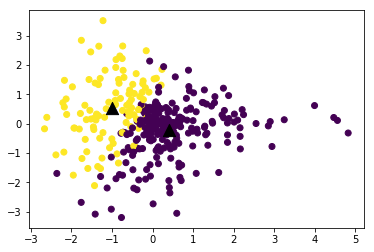

Nb : 3 Silhouette_score:  0.225253


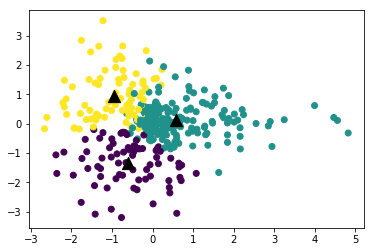

Nb : 4 Silhouette_score:  0.235291


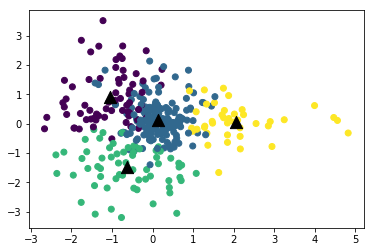

Nb : 5 Silhouette_score:  0.247786


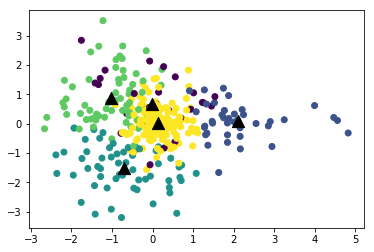

Nb : 6 Silhouette_score:  0.257428


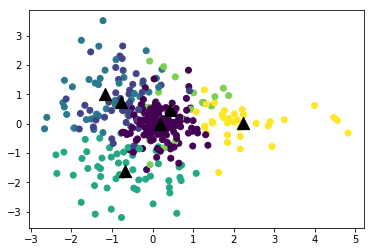

Nb : 7 Silhouette_score:  0.256345


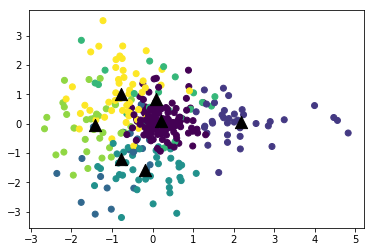

Nb : 8 Silhouette_score:  0.250058


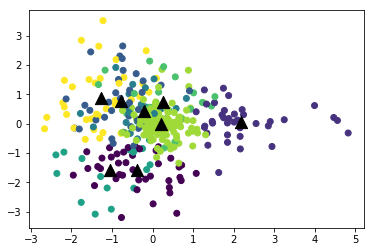

Nb : 9 Silhouette_score:  0.242711


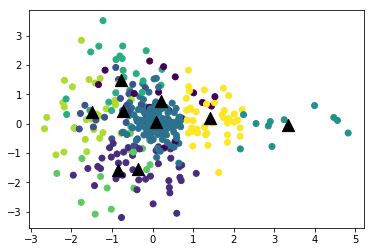

Nb : 10 Silhouette_score:  0.244232


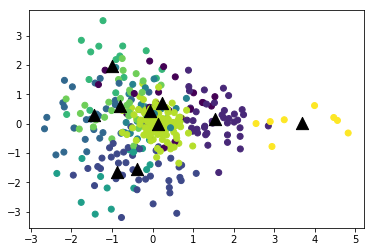

Nb : 11 Silhouette_score:  0.212737


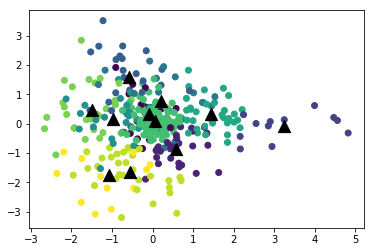

Nb : 12 Silhouette_score:  0.200914


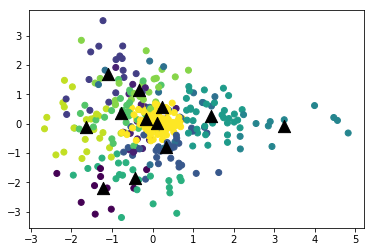

Nb : 13 Silhouette_score:  0.206216


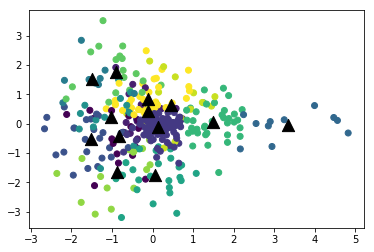

Nb : 14 Silhouette_score:  0.235201


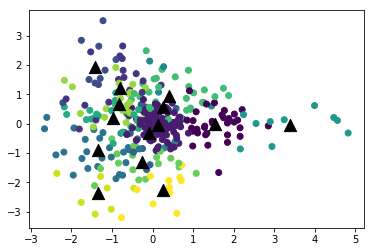

Nb : 15 Silhouette_score:  0.217334


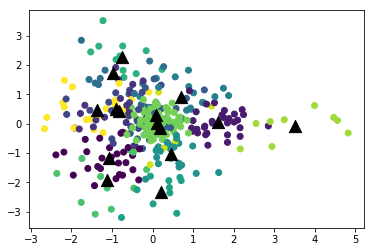

Nb : 16 Silhouette_score:  0.153424


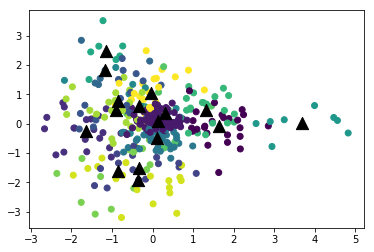

Nb : 17 Silhouette_score:  0.212827


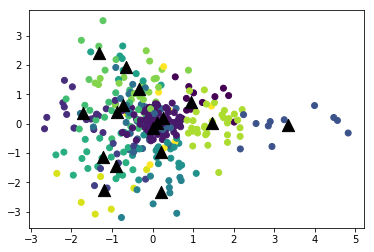

Nb : 18 Silhouette_score:  0.219716


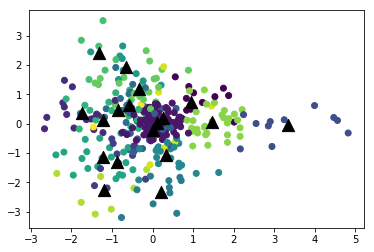

Nb : 19 Silhouette_score:  0.186736


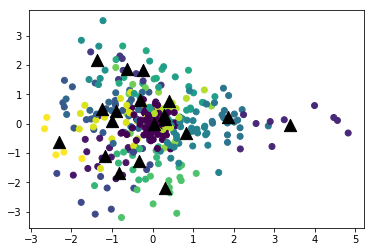

Nb : 20 Silhouette_score:  0.187281


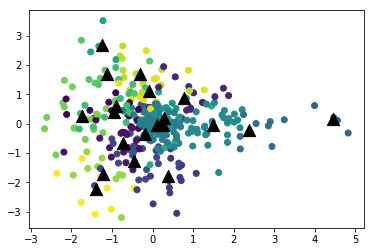

Nb : 21 Silhouette_score:  0.160339


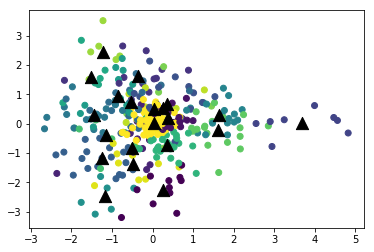

Nb : 22 Silhouette_score:  0.157296


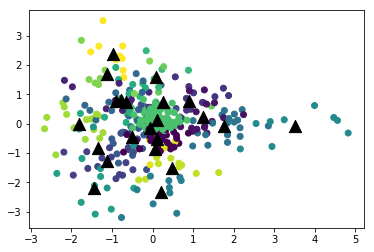

Nb : 23 Silhouette_score:  0.17426


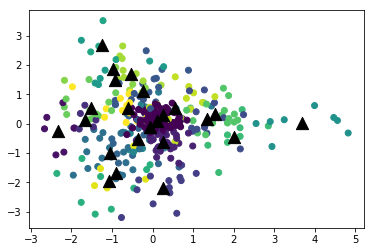

Nb : 24 Silhouette_score:  0.193287


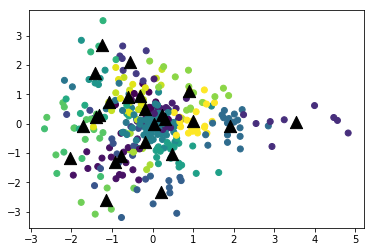

Nb : 25 Silhouette_score:  0.203789


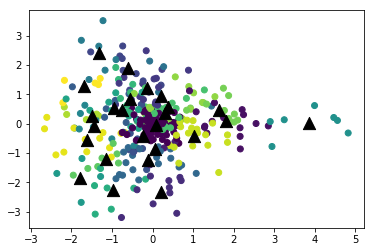

Nb : 26 Silhouette_score:  0.167958


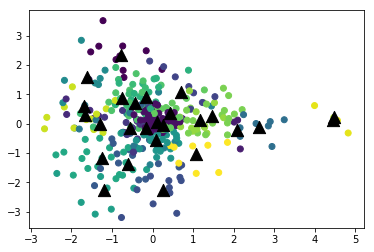

Nb : 27 Silhouette_score:  0.194776


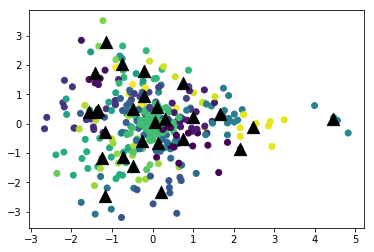

Nb : 28 Silhouette_score:  0.167345


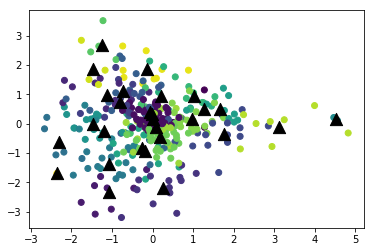

Nb : 29 Silhouette_score:  0.172115


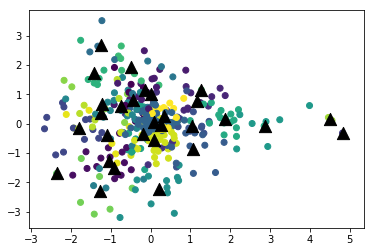

Nb : 30 Silhouette_score:  0.140968


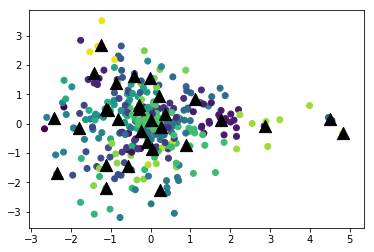

Nb : 31 Silhouette_score:  0.204926


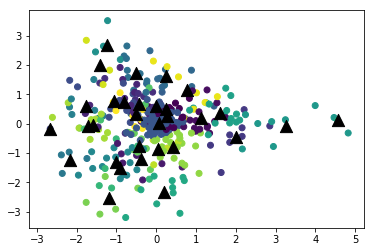

Nb : 32 Silhouette_score:  0.180001


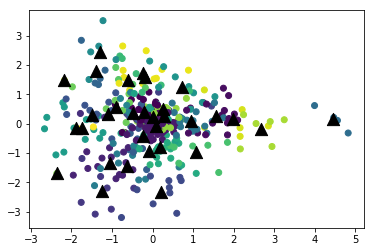

Nb : 33 Silhouette_score:  0.145911


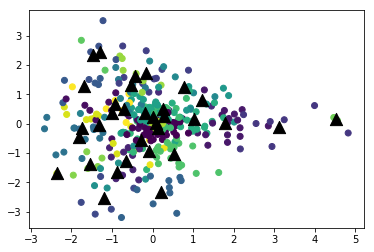

Nb : 34 Silhouette_score:  0.145221


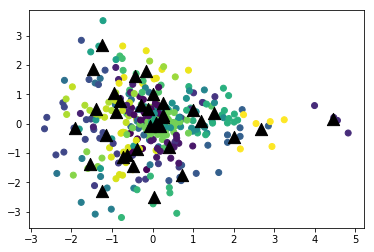

Nb : 35 Silhouette_score:  0.145031


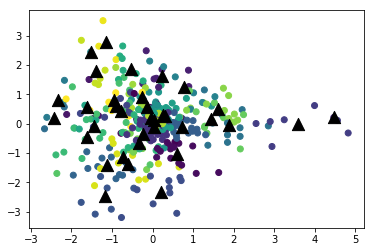

Nb : 36 Silhouette_score:  0.180848


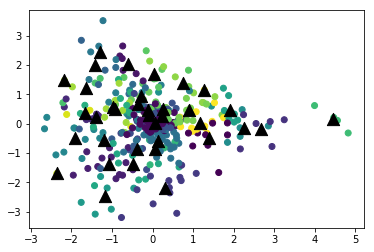

Nb : 37 Silhouette_score:  0.150877


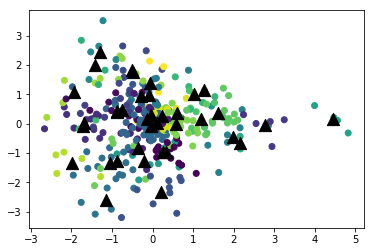

Nb : 38 Silhouette_score:  0.169251


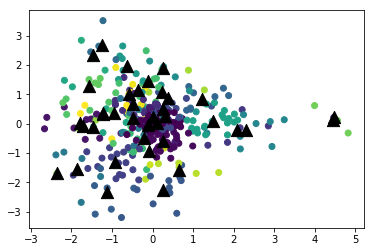

Nb : 39 Silhouette_score:  0.155931


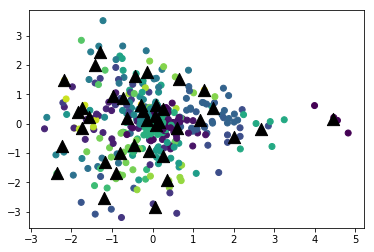

Nb : 40 Silhouette_score:  0.169426


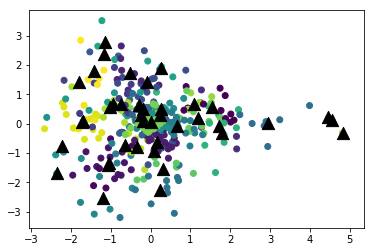

Nb : 41 Silhouette_score:  0.155376


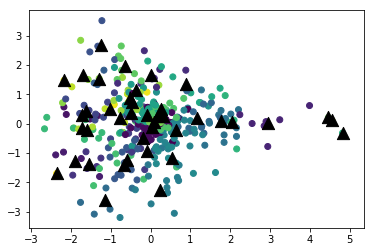

Nb : 42 Silhouette_score:  0.160897


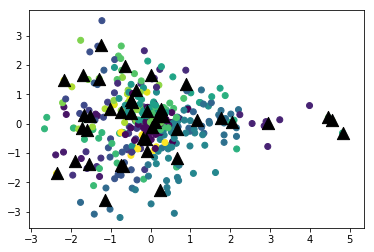

Nb : 43 Silhouette_score:  0.156568


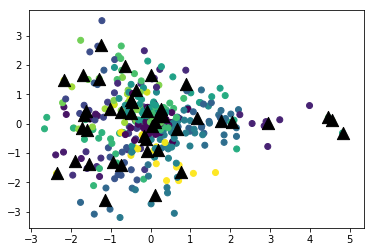

Nb : 44 Silhouette_score:  0.158181


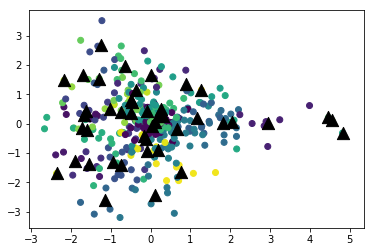

Nb : 45 Silhouette_score:  0.157668


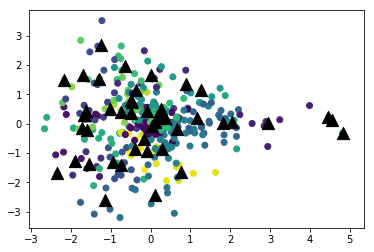

Nb : 46 Silhouette_score:  0.150328


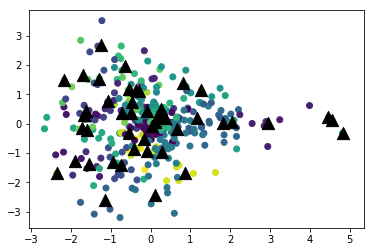

Nb : 47 Silhouette_score:  0.150815


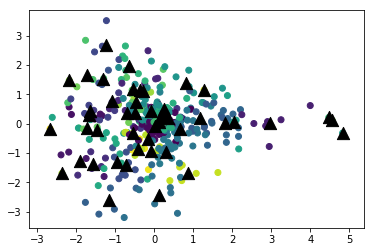

Nb : 48 Silhouette_score:  0.153602


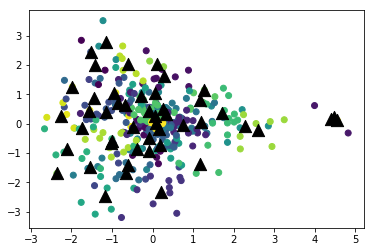

Nb : 49 Silhouette_score:  0.157424


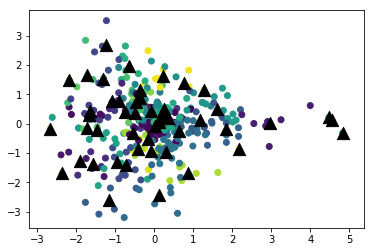

Nb : 50 Silhouette_score:  0.162649


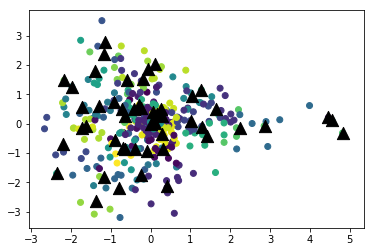

Nb : 51 Silhouette_score:  0.155002


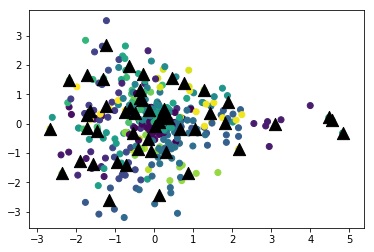

Nb : 52 Silhouette_score:  0.157954


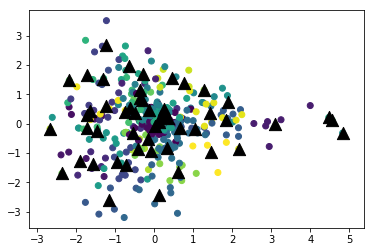

Nb : 53 Silhouette_score:  0.15885


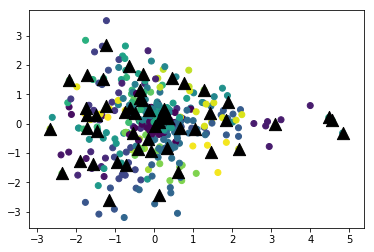

Nb : 54 Silhouette_score:  0.156536


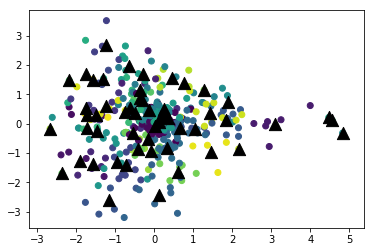

Nb : 55 Silhouette_score:  0.142233


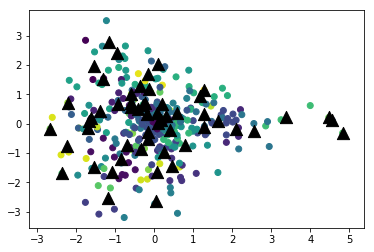

Nb : 56 Silhouette_score:  0.158287


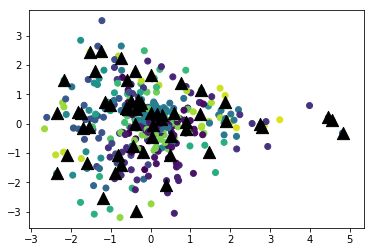

Nb : 57 Silhouette_score:  0.151669


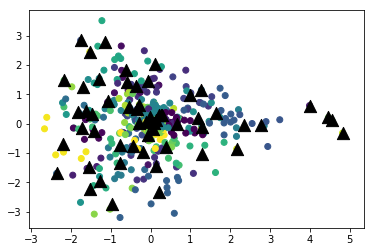

Nb : 58 Silhouette_score:  0.161733


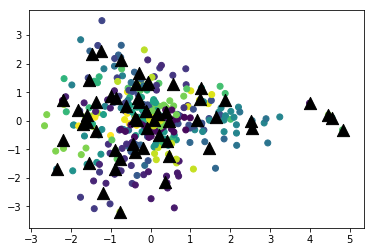

Nb : 59 Silhouette_score:  0.151161


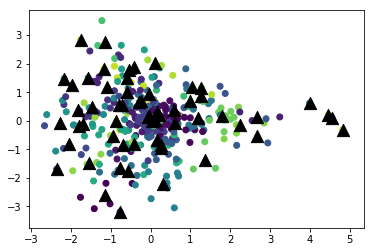

Nb : 60 Silhouette_score:  0.156865


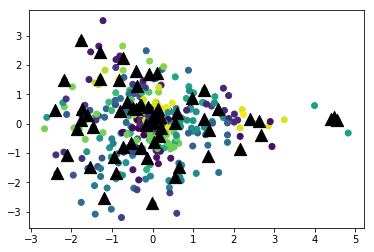

Nb : 61 Silhouette_score:  0.155736


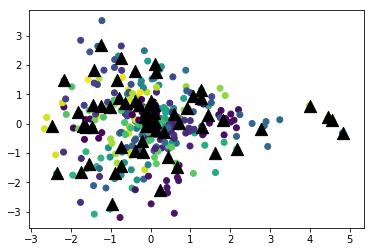

Nb : 62 Silhouette_score:  0.15329


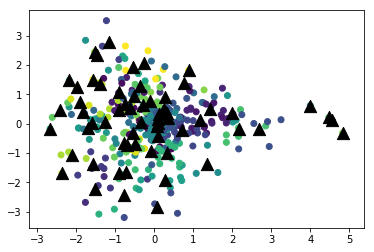

Nb : 63 Silhouette_score:  0.159197


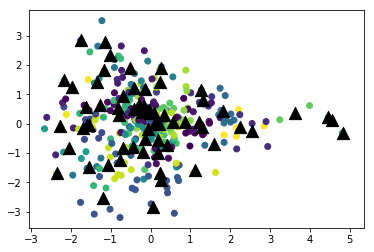

Nb : 64 Silhouette_score:  0.153578


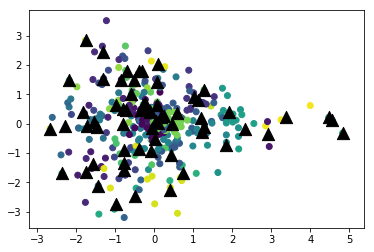

Nb : 65 Silhouette_score:  0.149871


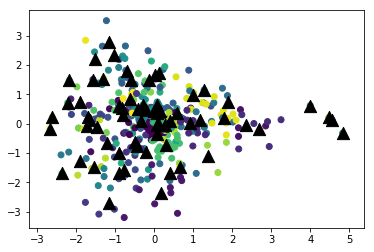

Nb : 66 Silhouette_score:  0.147423


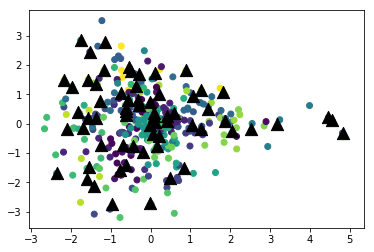

Nb : 67 Silhouette_score:  0.145583


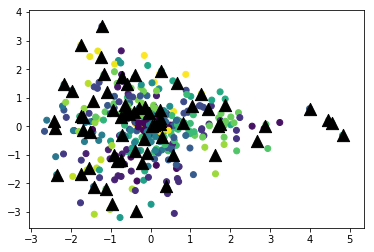

Nb : 68 Silhouette_score:  0.154498


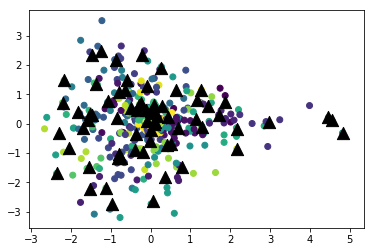

Nb : 69 Silhouette_score:  0.144213


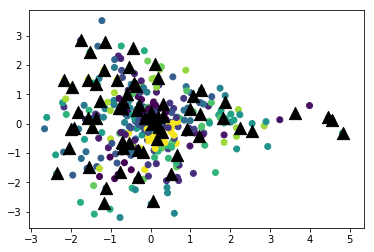

Nb : 70 Silhouette_score:  0.152336


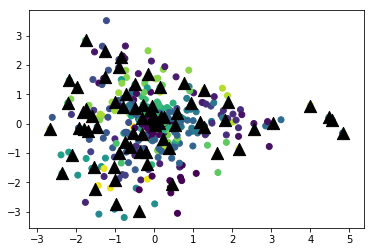

Nb : 71 Silhouette_score:  0.158115


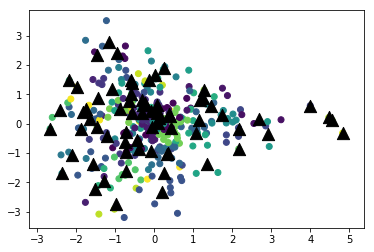

Nb : 72 Silhouette_score:  0.154837


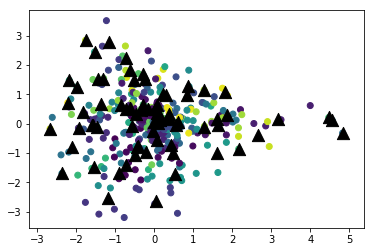

Nb : 73 Silhouette_score:  0.168147


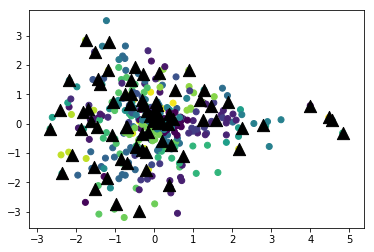

Nb : 74 Silhouette_score:  0.151784


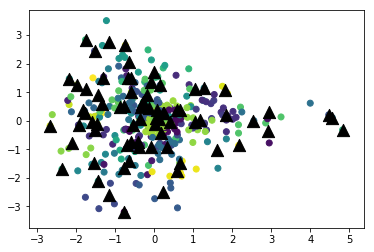

Nb : 75 Silhouette_score:  0.165214


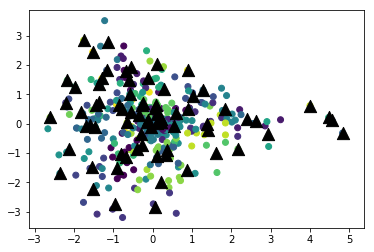

Nb : 76 Silhouette_score:  0.159075


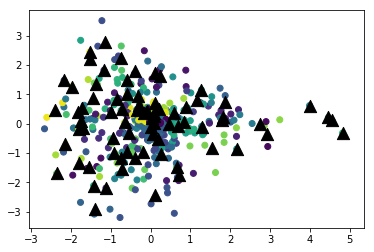

Nb : 77 Silhouette_score:  0.156899


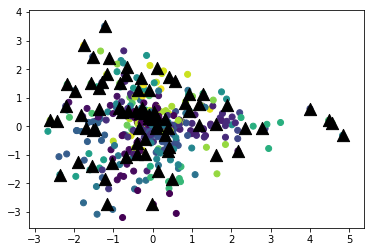

Nb : 78 Silhouette_score:  0.159404


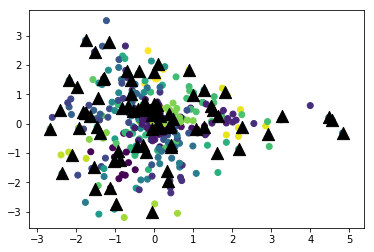

Nb : 79 Silhouette_score:  0.157123


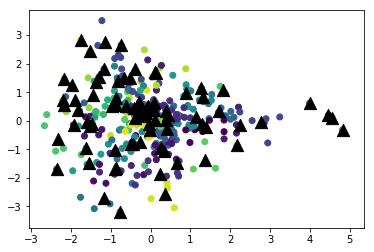

Nb : 80 Silhouette_score:  0.144517


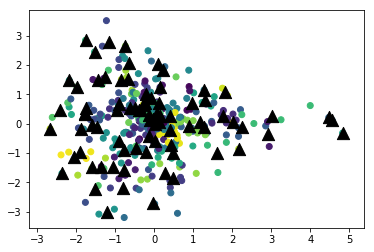

Nb : 81 Silhouette_score:  0.168299


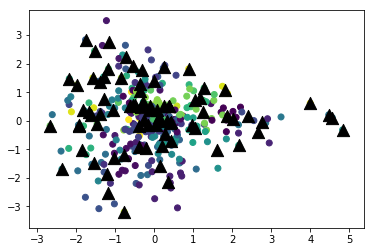

Nb : 82 Silhouette_score:  0.165293


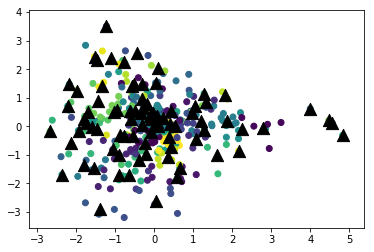

Nb : 83 Silhouette_score:  0.163731


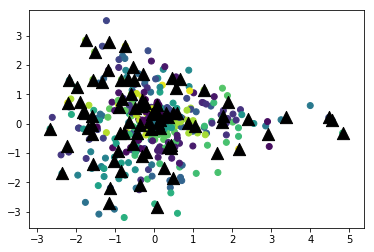

Nb : 84 Silhouette_score:  0.14814


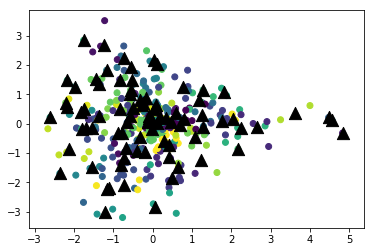

Nb : 85 Silhouette_score:  0.152955


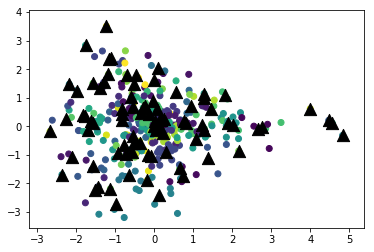

Nb : 86 Silhouette_score:  0.160829


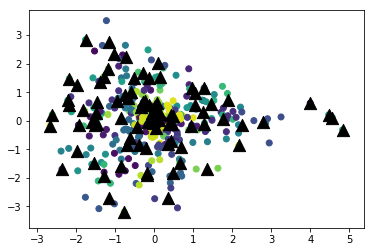

Nb : 87 Silhouette_score:  0.150613


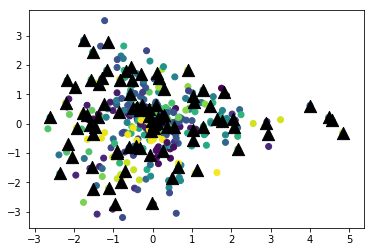

Nb : 88 Silhouette_score:  0.158907


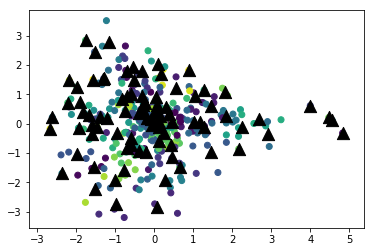

Nb : 89 Silhouette_score:  0.15928


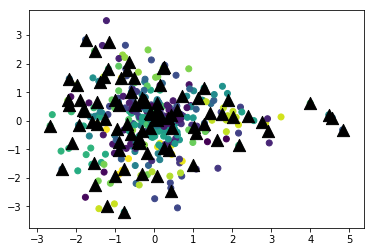

Nb : 90 Silhouette_score:  0.162329


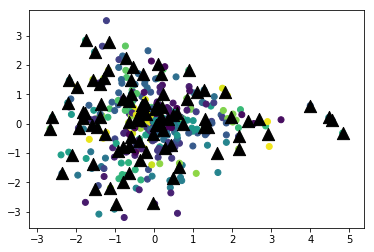

Nb : 91 Silhouette_score:  0.168889


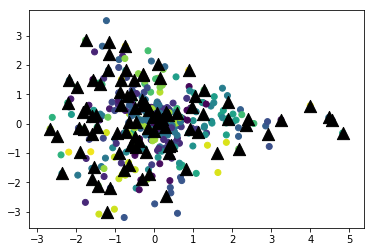

Nb : 92 Silhouette_score:  0.161988


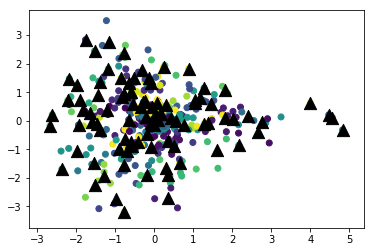

Nb : 93 Silhouette_score:  0.160672


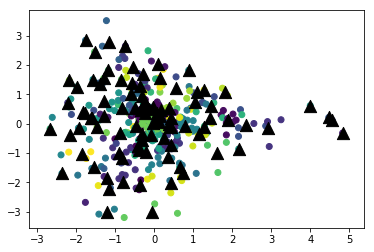

Nb : 94 Silhouette_score:  0.149043


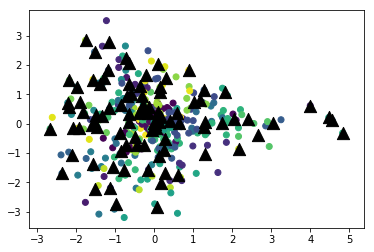

Nb : 95 Silhouette_score:  0.155999


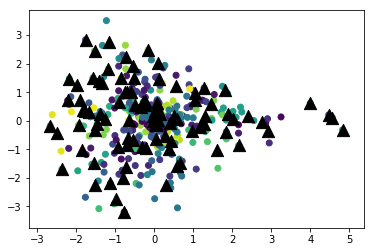

Nb : 96 Silhouette_score:  0.148743


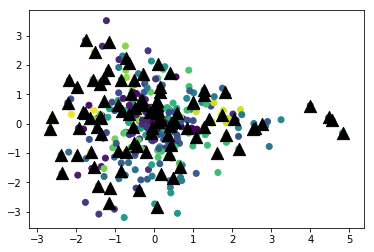

Nb : 97 Silhouette_score:  0.172243


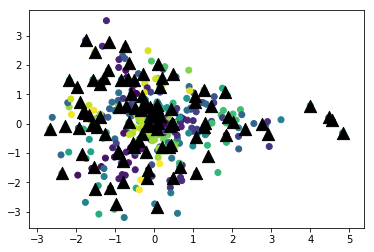

Nb : 98 Silhouette_score:  0.162415


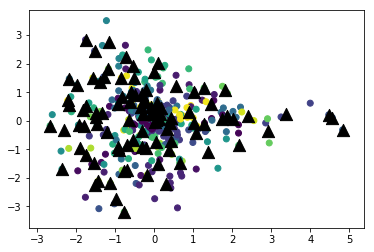

Nb : 99 Silhouette_score:  0.150176


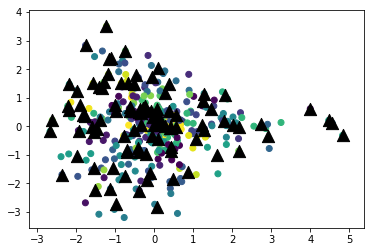

Nb : 100 Silhouette_score:  0.15187


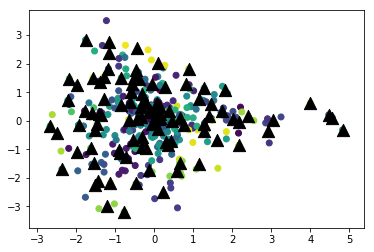

Nb : 101 Silhouette_score:  0.154348


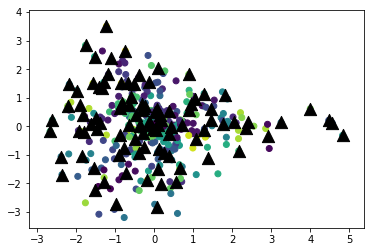

Nb : 102 Silhouette_score:  0.145538


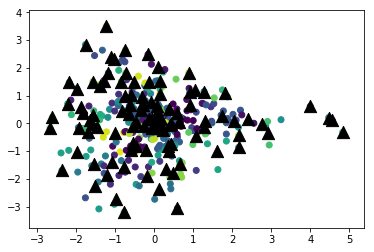

Nb : 103 Silhouette_score:  0.153553


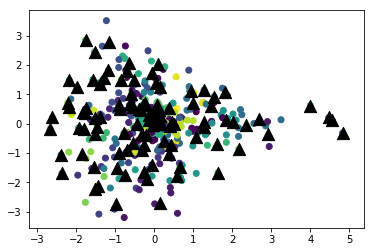

Nb : 104 Silhouette_score:  0.150773


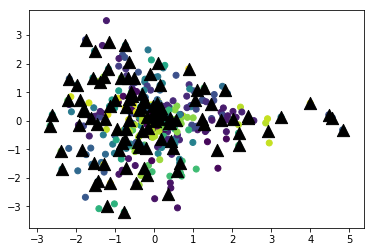

Nb : 105 Silhouette_score:  0.157672


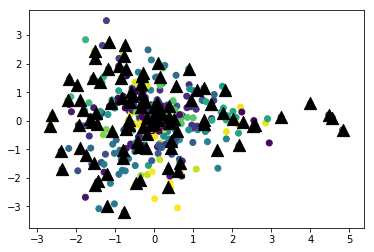

Nb : 106 Silhouette_score:  0.148336


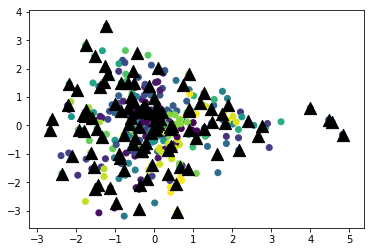

Nb : 107 Silhouette_score:  0.158487


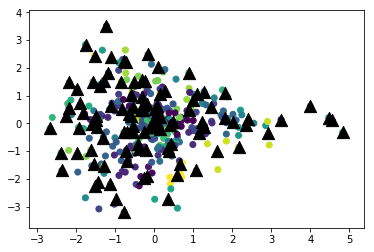

Nb : 108 Silhouette_score:  0.153315


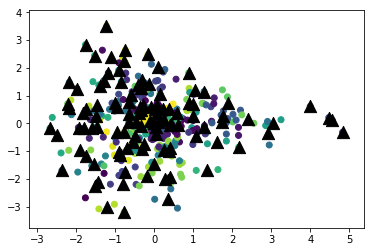

Nb : 109 Silhouette_score:  0.158049


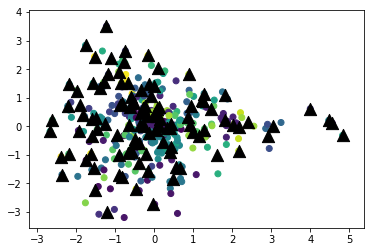

Nb : 110 Silhouette_score:  0.158686


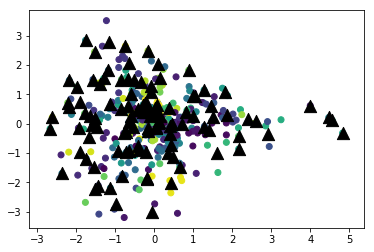

Nb : 111 Silhouette_score:  0.159051


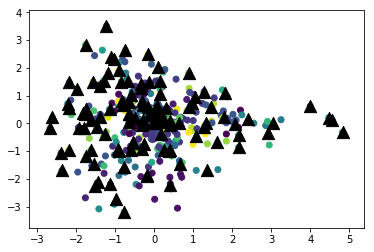

Nb : 112 Silhouette_score:  0.148396


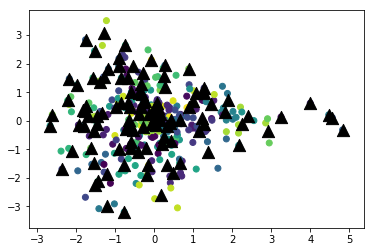

Nb : 113 Silhouette_score:  0.145052


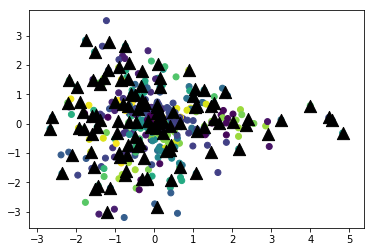

Nb : 114 Silhouette_score:  0.160052


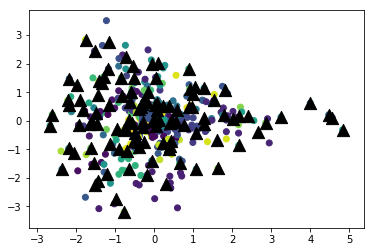

Nb : 115 Silhouette_score:  0.151723


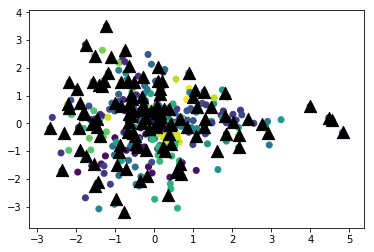

Nb : 116 Silhouette_score:  0.148383


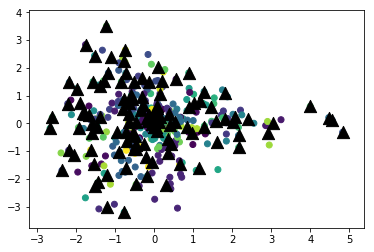

Nb : 117 Silhouette_score:  0.159752


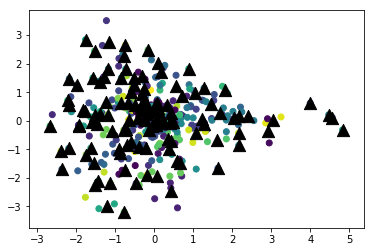

Nb : 118 Silhouette_score:  0.143959


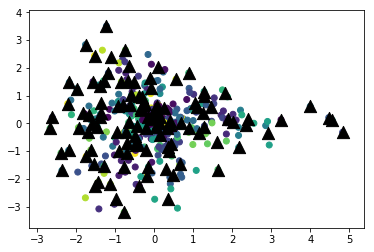

Nb : 119 Silhouette_score:  0.160312


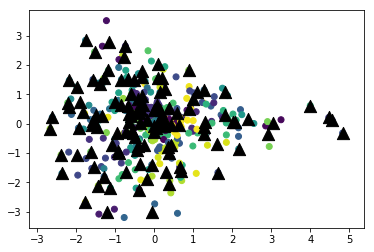

Nb : 120 Silhouette_score:  0.155993


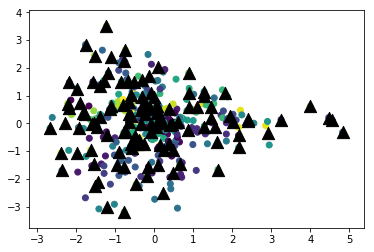

Nb : 121 Silhouette_score:  0.162257


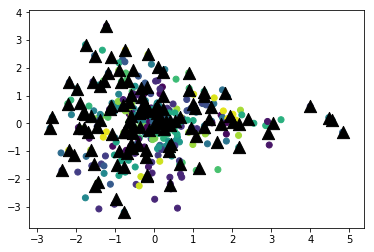

Nb : 122 Silhouette_score:  0.15163


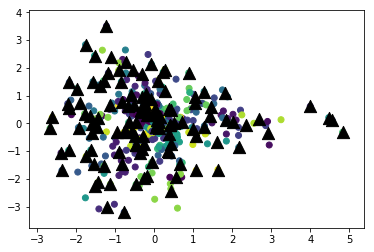

Nb : 123 Silhouette_score:  0.1538


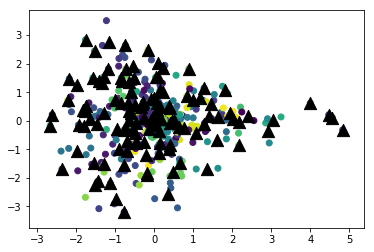

Nb : 124 Silhouette_score:  0.13445


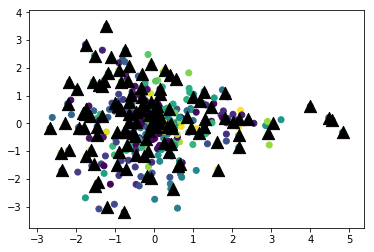

Nb : 125 Silhouette_score:  0.138389


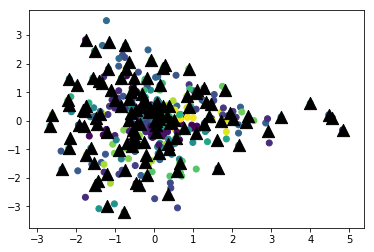

Nb : 126 Silhouette_score:  0.15238


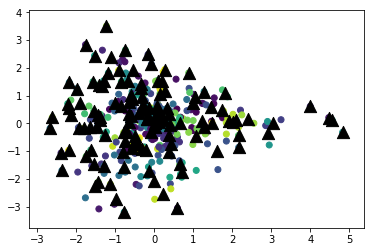

Nb : 127 Silhouette_score:  0.14599


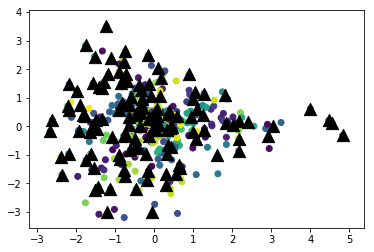

Nb : 128 Silhouette_score:  0.144459


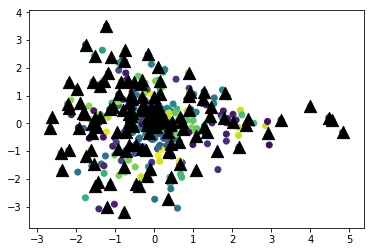

Nb : 129 Silhouette_score:  0.13723


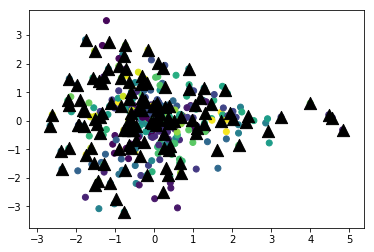

Nb : 130 Silhouette_score:  0.148689


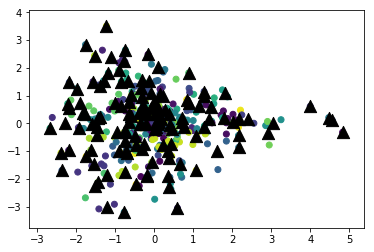

Nb : 131 Silhouette_score:  0.142034


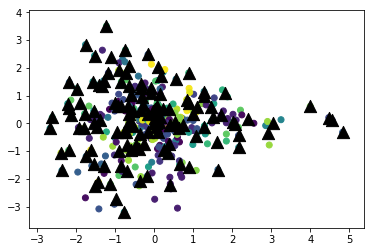

Nb : 132 Silhouette_score:  0.148781


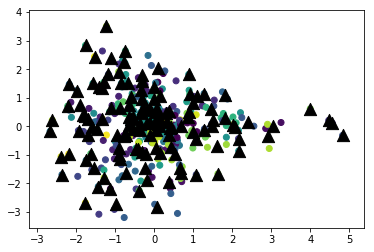

Nb : 133 Silhouette_score:  0.143864


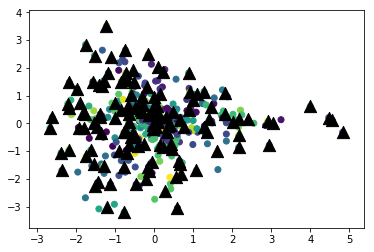

Nb : 134 Silhouette_score:  0.13941


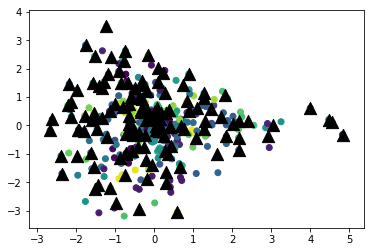

Nb : 135 Silhouette_score:  0.140033


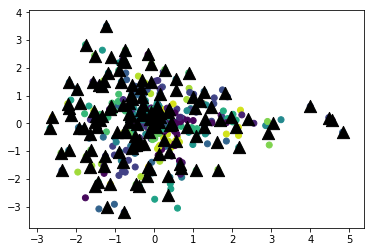

Nb : 136 Silhouette_score:  0.145949


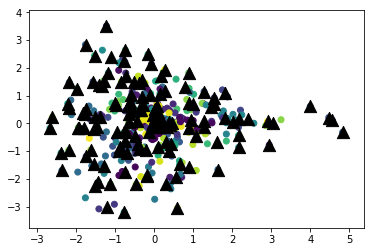

Nb : 137 Silhouette_score:  0.153477


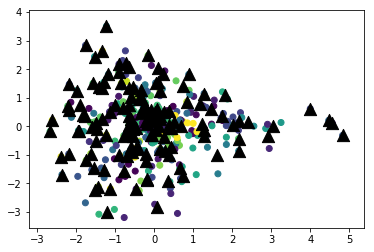

Nb : 138 Silhouette_score:  0.127315


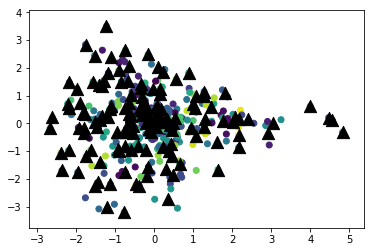

Nb : 139 Silhouette_score:  0.143029


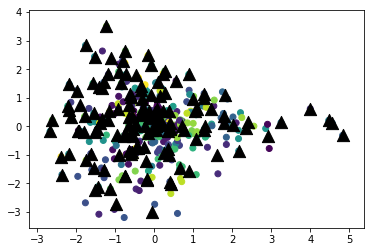

Nb : 140 Silhouette_score:  0.145175


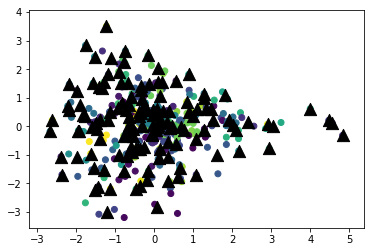

Nb : 141 Silhouette_score:  0.143075


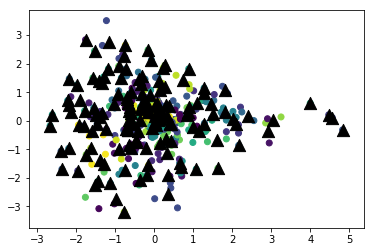

Nb : 142 Silhouette_score:  0.139483


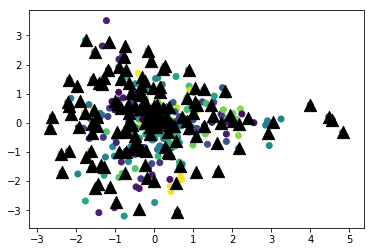

Nb : 143 Silhouette_score:  0.139183


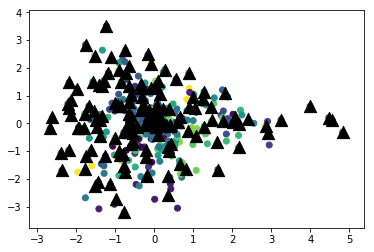

Nb : 144 Silhouette_score:  0.13901


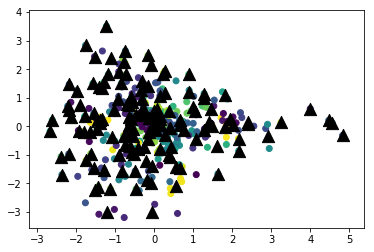

Nb : 145 Silhouette_score:  0.137087


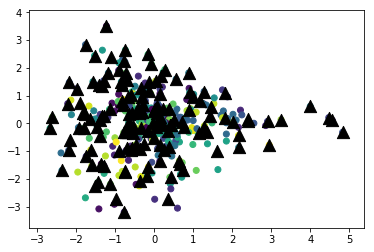

Nb : 146 Silhouette_score:  0.141449


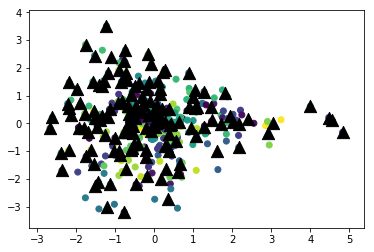

Nb : 147 Silhouette_score:  0.143385


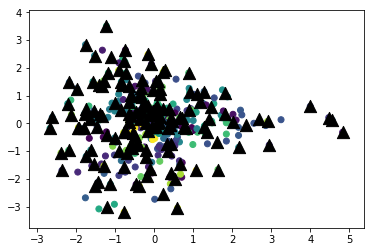

Nb : 148 Silhouette_score:  0.13571


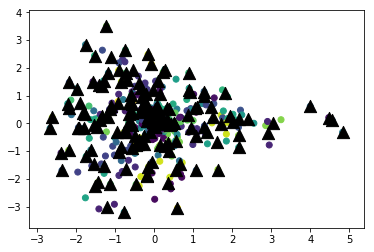

Nb : 149 Silhouette_score:  0.134872


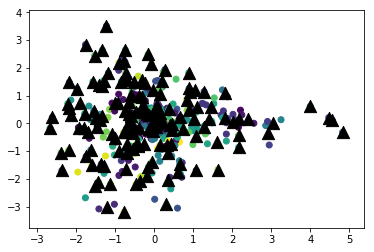

Nb : 150 Silhouette_score:  0.138342


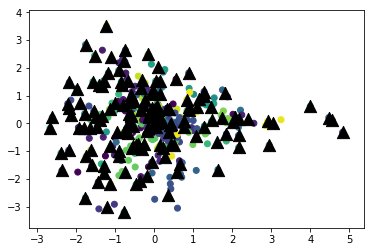

Nb : 151 Silhouette_score:  0.134311


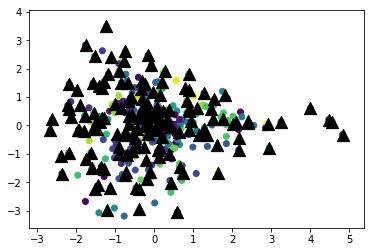

Nb : 152 Silhouette_score:  0.135247


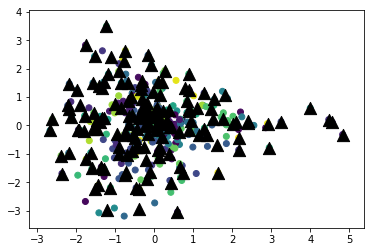

Nb : 153 Silhouette_score:  0.141219


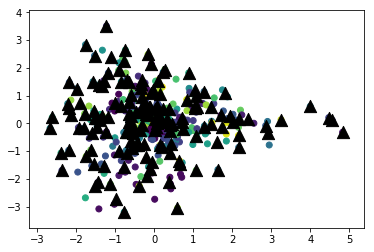

Nb : 154 Silhouette_score:  0.136779


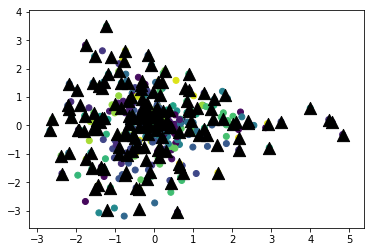

Nb : 155 Silhouette_score:  0.134498


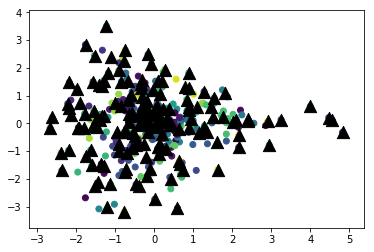

Nb : 156 Silhouette_score:  0.133332


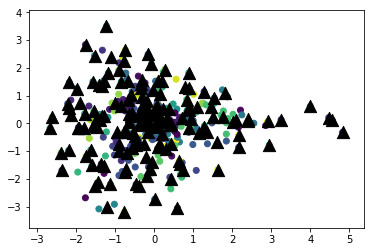

Nb : 157 Silhouette_score:  0.141061


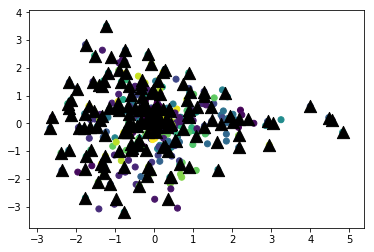

Nb : 158 Silhouette_score:  0.133258


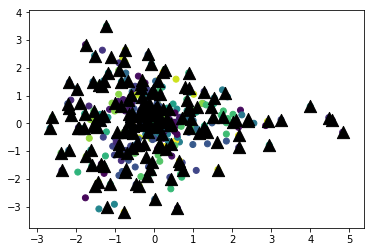

Nb : 159 Silhouette_score:  0.149318


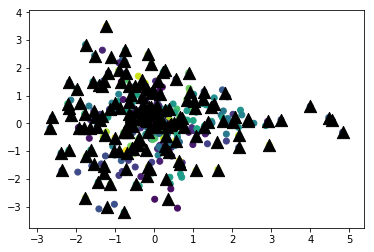

Nb : 160 Silhouette_score:  0.13352


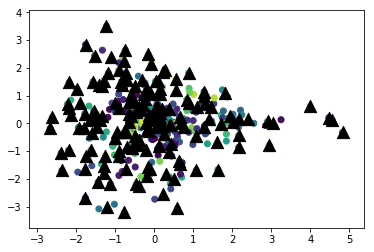

Nb : 161 Silhouette_score:  0.13084


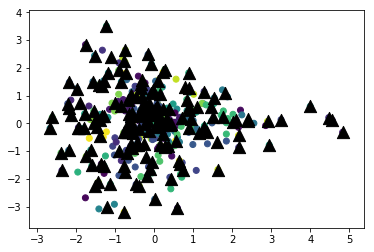

Nb : 162 Silhouette_score:  0.135585


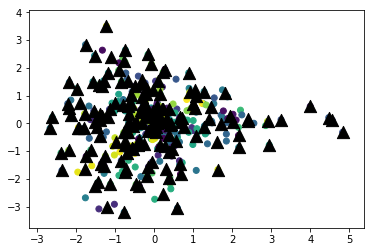

Nb : 163 Silhouette_score:  0.139515


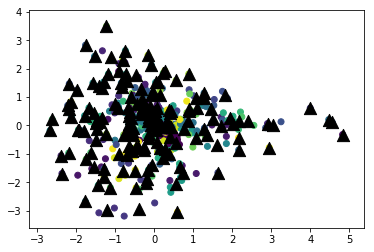

Nb : 164 Silhouette_score:  0.136605


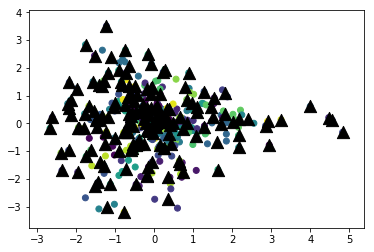

Nb : 165 Silhouette_score:  0.130158


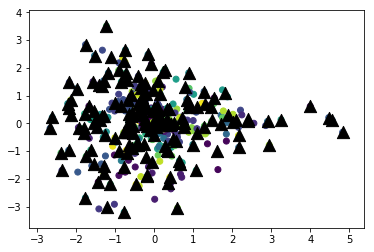

Nb : 166 Silhouette_score:  0.131354


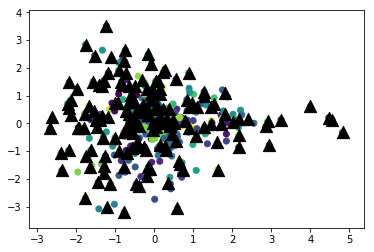

Nb : 167 Silhouette_score:  0.124828


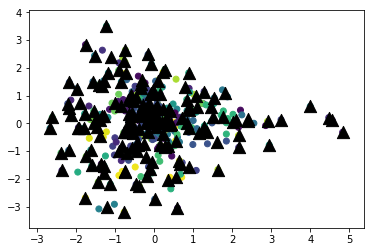

Nb : 168 Silhouette_score:  0.134277


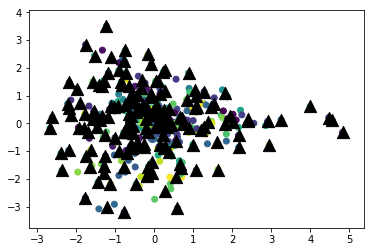

Nb : 169 Silhouette_score:  0.131977


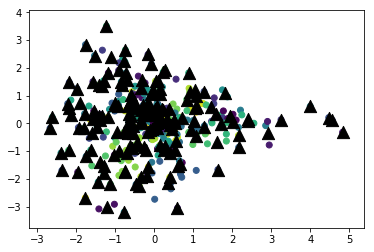

Nb : 170 Silhouette_score:  0.138174


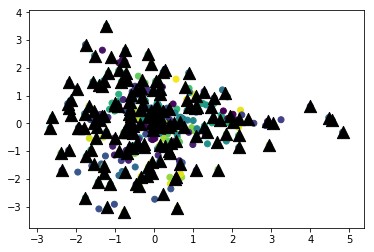

Nb : 171 Silhouette_score:  0.131945


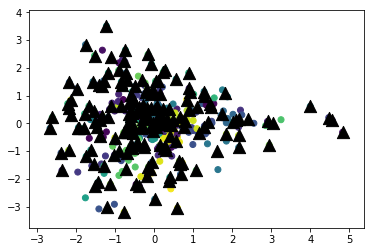

Nb : 172 Silhouette_score:  0.12364


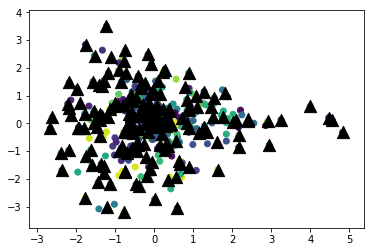

Nb : 173 Silhouette_score:  0.132672


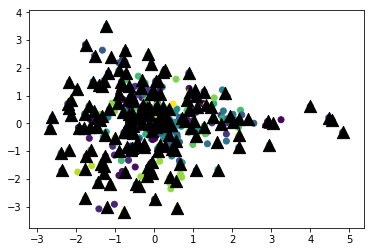

Nb : 174 Silhouette_score:  0.132809


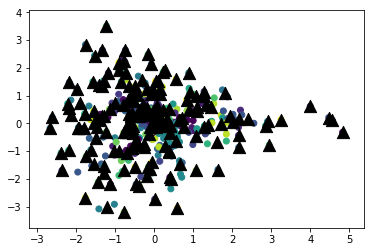

Nb : 175 Silhouette_score:  0.130412


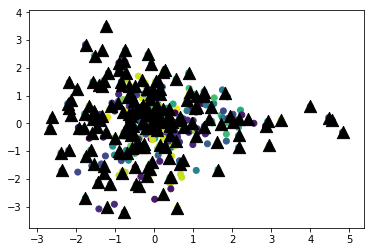

Nb : 176 Silhouette_score:  0.132947


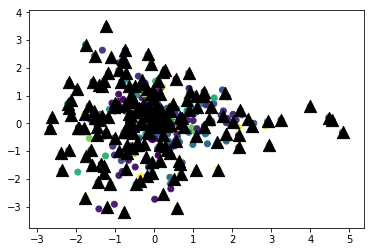

Nb : 177 Silhouette_score:  0.125788


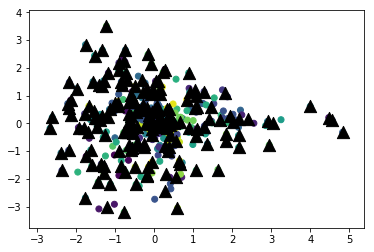

Nb : 178 Silhouette_score:  0.138059


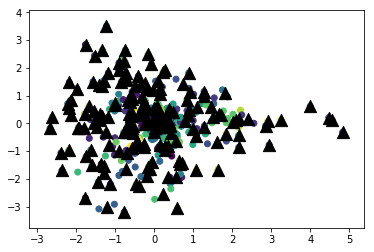

Nb : 179 Silhouette_score:  0.132042


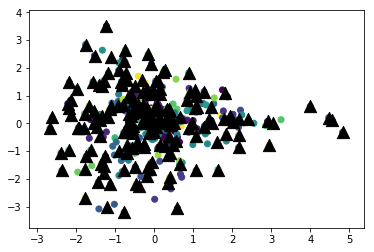

Nb : 180 Silhouette_score:  0.132792


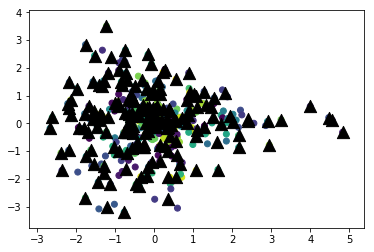

Nb : 181 Silhouette_score:  0.125049


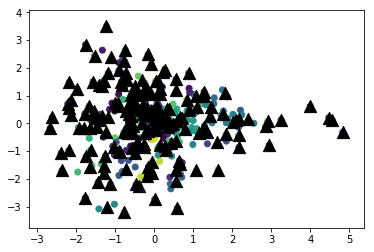

Nb : 182 Silhouette_score:  0.118347


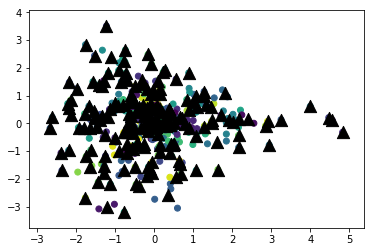

Nb : 183 Silhouette_score:  0.129139


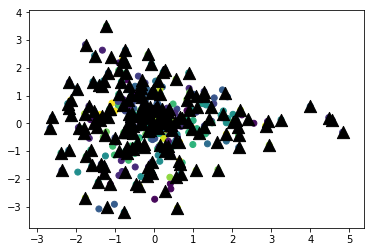

Nb : 184 Silhouette_score:  0.116708


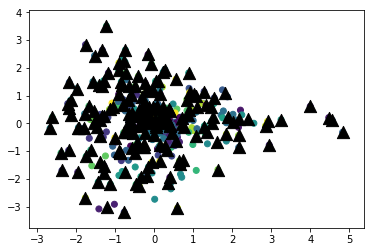

Nb : 185 Silhouette_score:  0.127887


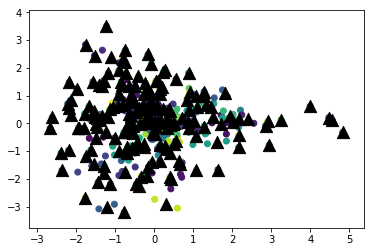

Nb : 186 Silhouette_score:  0.125296


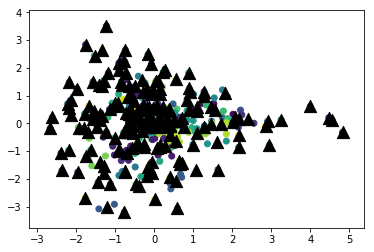

Nb : 187 Silhouette_score:  0.133485


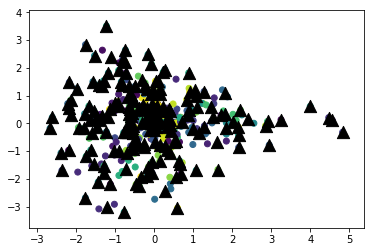

Nb : 188 Silhouette_score:  0.116015


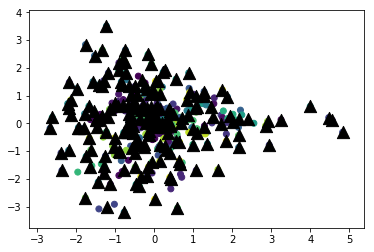

Nb : 189 Silhouette_score:  0.124585


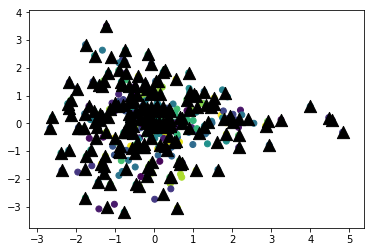

Nb : 190 Silhouette_score:  0.123102


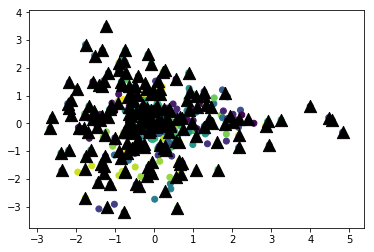

Nb : 191 Silhouette_score:  0.122217


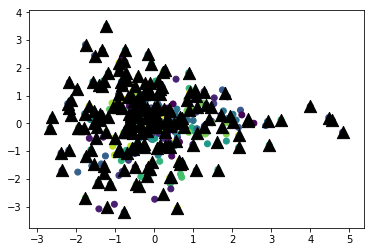

Nb : 192 Silhouette_score:  0.123787


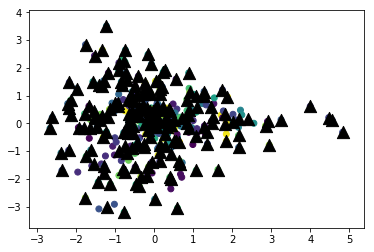

Nb : 193 Silhouette_score:  0.133058


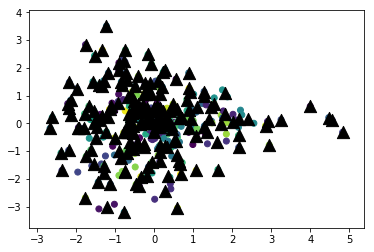

Nb : 194 Silhouette_score:  0.124045


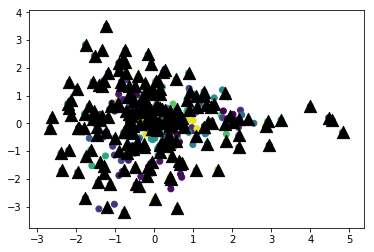

Nb : 195 Silhouette_score:  0.121846


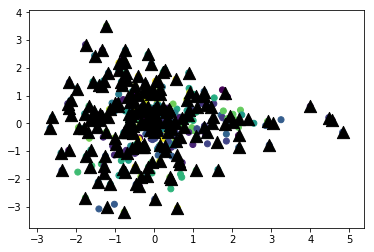

Nb : 196 Silhouette_score:  0.119407


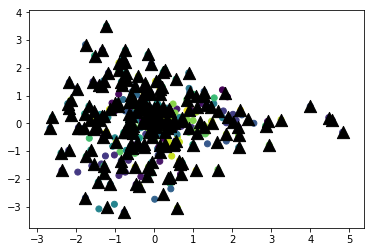

Nb : 197 Silhouette_score:  0.124775


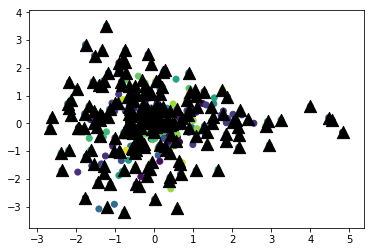

Nb : 198 Silhouette_score:  0.129457


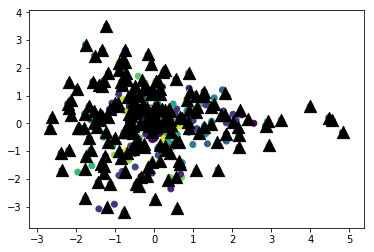

Nb : 199 Silhouette_score:  0.119637


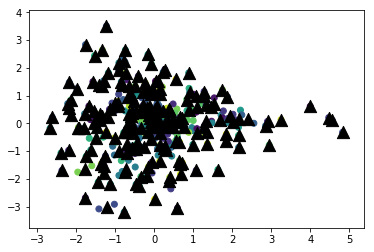

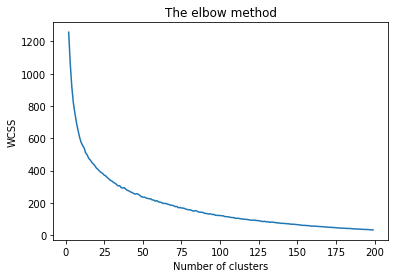

In [116]:
from sklearn.decomposition import PCA
wcss = []
X = model[model.wv.vocab]
#NUM_CLUSTERS=6
for NUM_CLUSTERS in range(2,200):
    #kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
    kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS,init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    labels = kmeans.labels_
    wcss.append(kmeans.inertia_)
    silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
    print ("Nb :",NUM_CLUSTERS,"Silhouette_score: ",silhouette_score)
    
    labels_fig=kmeans.labels_.tolist()
    l = kmeans.fit_predict(X)
    pca = PCA(n_components=2).fit(X)
    datapoint = pca.transform(X)
    
    plt.figure
    plt.scatter(datapoint[:, 0], datapoint[:, 1], c=labels_fig)

    centroids = kmeans.cluster_centers_
    centroidpoint = pca.transform(centroids)
    plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
    plt.show()
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(2, 200), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [113]:
# On essai avec KMEANS = 30

In [117]:
X = model[model.wv.vocab]

NUM_CLUSTERS=30
kclusterer = KMeansClusterer(NUM_CLUSTERS,euclidean_distance)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
 
df_res_kmeans = pd.DataFrame(columns= ['Groupe','Tags'])
n=0
words = list(model.wv.vocab)
for i, word in enumerate(words):  
    df_res_kmeans.loc[n]= [assigned_clusters[i],word]
    n += 1


In [118]:
df = pd.DataFrame(X)

In [119]:
df_group_k = df_res_kmeans.groupby(['Groupe']).count()
df_group_k.sort_values('Tags').head()

Tags
Groupe      
29         2
13         3
28         5
11         5
20         6

In [120]:
# A mes tags auto, je rajoute les tags les plus proches de mes tags auto qui sont dans le même cluster

In [121]:
# On récupère le cluster du tags
num_groupe = df_res_kmeans.loc[df_res_kmeans['Tags'] == 'python'].Groupe
print(num_groupe)

50    22
Name: Groupe, dtype: object


In [122]:
df_res_kmeans.head()

Groupe      Tags
0     21       get
1     19  function
2      3     class
3     14      post
4     12       api

In [123]:
df_res_kmeans[df_res_kmeans.Groupe==26]

Groupe           Tags
5       26          maven
24      26         spring
30      26  configuration
49      26        eclipse
84      26        service
154     26           java
167     26            jar
298     26         tomcat

In [124]:
# On récupère les plus proches voisins

In [125]:
df_coord = pd.DataFrame(X)

In [126]:
df_coord['tag'] = df_res_kmeans.Tags

In [127]:
df_coord['groupe'] = df_res_kmeans.Groupe

In [128]:
df_coord.head()

0         1         2         3         4         5         6  \
0  0.190116  0.090913 -0.022757 -0.030986 -0.151511 -0.122571 -0.228335   
1  0.252148  0.248794  0.105784 -0.335646 -0.043372 -0.008961 -0.216630   
2  0.318428  0.116783  0.380234  0.271704  0.125958 -0.028009 -0.421003   
3  0.165068  0.354103  0.042152 -0.473770 -0.150983  0.117580  0.041858   
4  0.307376  0.193118 -0.181327 -0.262597 -0.070458 -0.375648 -0.177812   

          7         8         9   ...         142       143       144  \
0  0.018869 -0.052380 -0.044434   ...    0.103341  0.109441 -0.077916   
1 -0.000619 -0.357397  0.055788   ...    0.233923  0.313170  0.127406   
2 -0.294075 -0.184737 -0.236335   ...   -0.227753 -0.124206 -0.219199   
3 -0.127303  0.084108 -0.035864   ...    0.536946  0.193532 -0.323930   
4 -0.109429  0.047639 -0.375063   ...    0.114662 -0.111419 -0.357657   

        145       146       147       148       149       tag  groupe  
0  0.063846 -0.013535 -0.099319  0.200060 -0.074176       get      21  
1 -0.210511 -0.336071 -0.053579  0.396332 -0.096810  function      19  
2 -0.053199  0.381246  0.244890 -0.143412 -0.004188     class       3  
3 -0.285205 -0.357040 -0.334627  0.594162  0.075429      post      14  
4 -0.169214 -0.127893 -0.172705  0.275710  0.055659       api      12  

[5 rows x 152 columns]

In [129]:
# On généralise à tous les tags

In [130]:
from scipy.spatial import distance

In [131]:
def distance2 (x, y):
    return (distance.euclidean(x, y) )

In [132]:
# fonction des plus proches voisins - 
def kPlusProcheVoisinQ (x, df_input):
    y=[]
    for i in range(len(df_input)):
        y.append(distance2 (df_input.loc[x], df_input.iloc[i]))
    dfy=pd.DataFrame(y).sort_values(by=0)
    dfy.columns = ['dist']
    qseuil = dfy.dist.quantile(0.20)
    compte = dfy[dfy.dist < qseuil].shape[0]
    if len(dfy) == 1:
        return (x)
    else:
        return (df_input.iloc[dfy[1:compte].index].index)

In [133]:
df_coord.loc[df_coord['tag']=='python'].groupe.values

array([22], dtype=object)

In [134]:
df_coord['tag_knn']=np.nan

In [135]:
list_all = []
for v_index in df_coord.index:
    # Je génère un dataframe sur le groupe du tag
    n_groupe = int(df_coord.loc[df_coord.index==v_index].groupe)
    df_coord_groupe = df_coord.loc[df_coord['groupe']==n_groupe]
    # Je recherche les plus proches voisins
    
    res_tag = kPlusProcheVoisinQ(v_index,df_coord_groupe.iloc[:,:-3])
    all_tag = ''
    for res in df_coord.tag[res_tag]:
        all_tag = all_tag + ',' +res

    list_all.append(all_tag)


In [136]:
df_coord['tag_knn']=list_all

In [137]:
df_coord.head(20)

0         1         2         3         4         5         6  \
0   0.190116  0.090913 -0.022757 -0.030986 -0.151511 -0.122571 -0.228335   
1   0.252148  0.248794  0.105784 -0.335646 -0.043372 -0.008961 -0.216630   
2   0.318428  0.116783  0.380234  0.271704  0.125958 -0.028009 -0.421003   
3   0.165068  0.354103  0.042152 -0.473770 -0.150983  0.117580  0.041858   
4   0.307376  0.193118 -0.181327 -0.262597 -0.070458 -0.375648 -0.177812   
5   0.214948 -0.268434 -0.550420  0.340383 -0.209695 -0.575163 -0.426578   
6   0.459115  0.063842 -0.006961  0.142273 -0.073948 -0.150707 -0.349888   
7   0.303687 -0.056560 -0.035844 -0.026434 -0.129997 -0.157618 -0.259308   
8   0.199757  0.139474 -0.192246 -0.238335 -0.078841 -0.217509 -0.271289   
9   0.245764 -0.067698 -0.128542  0.012493 -0.126992 -0.172863 -0.279516   
10 -0.122306 -0.186177 -0.294727 -0.004286 -0.103723 -0.370941 -0.198972   
11  0.091630  0.437559  0.217904 -0.728176 -0.134463 -0.147067  0.311628   
12  0.033220  0.339517  0.341293 -0.250965 -0.013770 -0.358012  0.230753   
13  0.131301  0.145640 -0.226992 -0.395938 -0.173364 -0.484609  0.096131   
14  0.263627  0.484073  0.646290  0.166564  0.119842  0.111453 -0.107037   
15  0.483310 -0.034098  0.113873  0.060576 -0.079624 -0.051230 -0.484148   
16  0.406423  0.220535  0.335044  0.071222  0.060654 -0.036695 -0.398652   
17  0.292859 -0.010611  0.054423  0.037921 -0.095599 -0.003787 -0.412186   
18  0.205750  0.399827  0.167055 -0.606622 -0.113537 -0.250265  0.239259   
19  0.784362  0.290734  0.326329  0.174646 -0.167530  0.121372 -0.335447   

           7         8         9  \
0   0.018869 -0.052380 -0.044434   
1  -0.000619 -0.357397  0.055788   
2  -0.294075 -0.184737 -0.236335   
3  -0.127303  0.084108 -0.035864   
4  -0.109429  0.047639 -0.375063   
5   0.077984  0.772170 -0.575114   
6   0.040482  0.285484 -0.253748   
7  -0.011127 -0.159175 -0.083658   
8  -0.035571  0.172486 -0.305208   
9   0.049507  0.085774 -0.166577   
10  0.111717  0.187851 -0.215174   
11 -0.142520 -0.319980  0.066171   
12 -0.225162 -0.507590 -0.065451   
13 -0.082764 -0.036199 -0.200074   
14 -0.383288 -0.128956 -0.240743   
15  0.117014 -0.450536  0.000770   
16  0.003256 -0.140629 -0.149540   
17  0.120482 -0.273988 -0.035266   
18 -0.076021 -0.380195  0.052433   
19 -0.178704  0.056528 -0.099222   

                          ...                              143       144  \
0                         ...                         0.109441 -0.077916   
1                         ...                         0.313170  0.127406   
2                         ...                        -0.124206 -0.219199   
3                         ...                         0.193532 -0.323930   
4                         ...                        -0.111419 -0.357657   
5                         ...                        -0.394424 -0.859177   
6                         ...                        -0.082281 -0.410636   
7                         ...                         0.042871  0.066153   
8                         ...                        -0.022720 -0.330668   
9                         ...                        -0.032642 -0.208288   
10                        ...                        -0.032306 -0.318570   
11                        ...                         0.390359 -0.023002   
12                        ...                         0.158852  0.212961   
13                        ...                         0.029267 -0.233847   
14                        ...                        -0.083263 -0.062940   
15                        ...                         0.194959  0.314928   
16                        ...                         0.080833  0.055258   
17                        ...                         0.183711  0.085498   
18                        ...                         0.332477  0.090539   
19                        ...                        -0.085356 -0.164954   

         145       146       147       148       149        

In [138]:
def rempli_tag_knn(tags_auto):
    tag = ''
    for t in tags_auto.split():
        tag_associe = df_coord[df_coord.tag == t].tag_knn
        tag = tag + ',' + tag_associe.item()
    return(tag)

In [139]:
rempli_tag_knn(df_stack_travail.tags_auto[1])

',,oauth,rest,,jar,,junit,,unicode,perl,scripting,multithreading,tfs,,api,oauth,,netbeans,jboss,encryption,serialization,caching,,github,jenkins'

In [140]:
df_stack_travail['tag_knn'] = df_stack_travail.tags_auto.apply(lambda row : rempli_tag_knn(row))

In [141]:
df_stack_travail['tag_knn'] = df_stack_travail['tag_knn'].apply(lambda x: x.replace(',',' '))

In [142]:
df_stack_travail['tag_knn'] = df_stack_travail['tag_knn'].apply(lambda x: x.replace('  ',' '))

In [143]:
df_stack_travail.head(20)

Title  \
0   Can I use enable_if to have two functions with...   
1       Unexpected element: CDATA soapUI maven plugin   
2                              Sticky-top on two rows   
3   How to converting an array to a dictionary in ...   
4                            How do i loop a function   
5           statistical superiority with ttest Matlab   
6    Using Spring Data Repositories in static methods   
7   Api 23: NetworkScheduler: Invalid component sp...   
8   Find first element in array and place it at th...   
9   Can an IF/AND + INDEX/MATCH formula pull value...   
10  simplefunge - NilClass error even when top of ...   
11   How to blur a Container or Any widget in Flutter   
12  Preventing premature session fixture teardown ...   
13             Open sorting dialogue via VBA in Excel   
14  Saving entity with PagingAndSortingRepository....   
15            comparison of Words among two DataFrame   
16  how to update one record column to true, all e...   
17           Logstash : Filter column values in a log   
18  Count every distinct values from mongodb then ...   
19  Location of printStackTrace() log when applica...   

                                         commentaire1  \
0   ['According to ', 'this post', ', enable_if ca...   
1   ["I'm writing tests for a rest API. I'm using ...   
2   ["I've tried many different ways to have two r...   
3   ['I have the following array of arrays:', '  '...   
4   ["I am learning javascript at the moment and i...   
5   ['Given two vectors of values provided by two ...   
6   ['I defined 2 classes.', '  ', 'AndroidPush.ja...   
7   ['I have a error in api 23 when i run my app:'...   
8   ['Given the following array:', '  ', '$arr = a...   
9   ['Lets say I have a table in sheet 2: ', '  ',...   
10  ['CODE:', '  ', '91+I-v      V      O      @ '...   
11  ['I am trying to achieve a blur effect on a Co...   
12  ["I'm setting up some configuration in conftes...   
13  ['In Excel (via VBA) I preselect a range and s...   
14  ['I am using Spring Data Rest in my applicatio...   
15  ['I have two ', 'Dataframes', ' ', 'df1', ' an...   
16  ['I am trying to update a column in a record t...   
17  ['I am using Logstash to parse and filter the ...   
18  ["I'm trying to get the count of every distinc...   
19  ['I have a sample code like below in my class ...   

                                                 Tags  \
0                         <c++><templates><enable-if>   
1                         <json><rest><maven><soapui>   
2                      <html><css><twitter-bootstrap>   
3   <javascript><data-structures><javascript-objects>   
4                                        <javascript>   
5                           <matlab><hypothesis-test>   
6                 <java><spring><spring-repositories>   
7             <java><android><android-studio><gradle>   
8                                      <php><sorting>   
9                                             <excel>   
10                                             <null>   
11                                          <flutter>   
12                                   <python><pytest>   
13                                        <excel-vba>   
14  <java><jpa><spring-data-jpa><spring-data><spri...   
15            <python><python-3.x><pandas><dataframe>   
16                      <sql><sql-server><sql-update>   
17                                         <logstash>   
18         <angularjs><mongodb><mean-stack><amcharts>   
19                                    <java><logging>   

                                          Commentaire  \
0   use two functions name arguments different ret...   
1   unexpected element cdata soapui maven plugin w...   
2   two rows tried many different ways two rows be...   
3   converting array dictionary javascript also co...   
4   loop function learning javascript moment want ...   
5   statistical superiority ttest matlab two vecto...   
6   using spring data repositories static methods ...  

In [144]:
df_stack_travail['nb_tag_knn']=df_stack_travail['tag_knn'].apply(lambda x: len(x.split()))

In [145]:
df_stack_travail['nb_tag_knn_dans_reel']=df_stack_travail.apply(lambda row: compte_mots(row['tag_knn'],row['tags_reel_stack']), axis=1)

In [146]:
df_stack_travail.head()

Title  \
0  Can I use enable_if to have two functions with...   
1      Unexpected element: CDATA soapUI maven plugin   
2                             Sticky-top on two rows   
3  How to converting an array to a dictionary in ...   
4                           How do i loop a function   

                                        commentaire1  \
0  ['According to ', 'this post', ', enable_if ca...   
1  ["I'm writing tests for a rest API. I'm using ...   
2  ["I've tried many different ways to have two r...   
3  ['I have the following array of arrays:', '  '...   
4  ["I am learning javascript at the moment and i...   

                                                Tags  \
0                        <c++><templates><enable-if>   
1                        <json><rest><maven><soapui>   
2                     <html><css><twitter-bootstrap>   
3  <javascript><data-structures><javascript-objects>   
4                                       <javascript>   

                                         Commentaire  \
0  use two functions name arguments different ret...   
1  unexpected element cdata soapui maven plugin w...   
2  two rows tried many different ways two rows be...   
3  converting array dictionary javascript also co...   
4  loop function learning javascript moment want ...   

                                    tags_auto  \
0                     get function class post   
1  api maven properties time rest groovy path   
2                        html flex https view   
3    arrays time object dictionary javascript   
4                get function html javascript   

                                       tags_reel             tags_reel_stack  \
0                        c++ templates enable-if               c++ templates   
1                         json rest maven soapui             rest maven json   
2                     html css twitter-bootstrap  twitter-bootstrap css html   
3  javascript data-structures javascript-objects  javascript data-structures   
4                                     javascript                  javascript   

   nb_tags_reel_stack  nb_tags_auto_dans_reel  \
0                   2                       0   
1                   3                       2   
2                   3                       1   
3                   2                       1   
4                   1                       1   

                             tags_news  nb_tags_news  nb_tags_news_dans_reel  \
0        razor pagination autocomplete             3                       0   
1               jboss encryption redis             3                       0   
2                      dom tabs iframe             3                       0   
3            recursion sorting haskell             3                       0   
4  autocomplete pagination woocommerce             3                       0   

                                             tag_knn  nb_tag_knn  \
0   hash activerecord pagination search binding w...           6   
1   oauth rest jar junit unicode perl scripting m...          18   
2                                 javascript scroll            2   
3   algorithm dictionary unicode perl scripting m...          11   
4   hash activerecord pagination search javascrip...           6   

   nb_tag_knn_dans_reel  
0                     0  
1                     1  
2                     0  
3                     0  
4                     1

In [147]:
# Bag of words

In [148]:
predico = df_stack_travail.tags_auto.apply(lambda x: x.split())

In [149]:
predico.head()

0                         [get, function, class, post]
1    [api, maven, properties, time, rest, groovy, p...
2                            [html, flex, https, view]
3       [arrays, time, object, dictionary, javascript]
4                    [get, function, html, javascript]
Name: tags_auto, dtype: object

Bag of Words on the Data set
Create a dictionary from ‘processed_docs’ containing the number of times a word appears in the training set.

In [150]:
dictionary = gensim.corpora.Dictionary(predico)

2019-05-27 10:29:14,549 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2019-05-27 10:29:14,667 : INFO : adding document #10000 to Dictionary(370 unique tokens: ['class', 'function', 'get', 'post', 'api']...)
2019-05-27 10:29:14,785 : INFO : adding document #20000 to Dictionary(370 unique tokens: ['class', 'function', 'get', 'post', 'api']...)
2019-05-27 10:29:14,904 : INFO : adding document #30000 to Dictionary(371 unique tokens: ['class', 'function', 'get', 'post', 'api']...)
2019-05-27 10:29:15,024 : INFO : adding document #40000 to Dictionary(371 unique tokens: ['class', 'function', 'get', 'post', 'api']...)
2019-05-27 10:29:15,044 : INFO : built Dictionary(371 unique tokens: ['class', 'function', 'get', 'post', 'api']...) from 41587 documents (total 219241 corpus positions)


In [151]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 20:
        break

0 class
1 function
2 get
3 post
4 api
5 groovy
6 maven
7 path
8 properties
9 rest
10 time
11 flex
12 html
13 https
14 view
15 arrays
16 dictionary
17 javascript
18 object
19 matlab
20 null


Gensim doc2bow
For each document we create a dictionary reporting how many
words and how many times those words appear. Save this to ‘bow_corpus’, then check our selected document earlier.

In [152]:
bow_corpus = [dictionary.doc2bow(doc) for doc in predico]

In [153]:
bow_corpus[10]

[(20, 1)]

In [154]:
import gensim

Running LDA using Bag of Words
Train our lda model using gensim.models.LdaMulticore and save it to ‘lda_model’

In [155]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=25, id2word=dictionary, passes=2, workers=2)

2019-05-27 10:29:15,730 : INFO : using symmetric alpha at 0.04
2019-05-27 10:29:15,731 : INFO : using symmetric eta at 0.04
2019-05-27 10:29:15,732 : INFO : using serial LDA version on this node
2019-05-27 10:29:15,849 : INFO : running online LDA training, 25 topics, 2 passes over the supplied corpus of 41587 documents, updating every 4000 documents, evaluating every ~40000 documents, iterating 50x with a convergence threshold of 0.001000
2019-05-27 10:29:15,851 : INFO : training LDA model using 2 processes
2019-05-27 10:29:15,907 : INFO : PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/41587, outstanding queue size 1
2019-05-27 10:29:15,914 : INFO : PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/41587, outstanding queue size 2
2019-05-27 10:29:15,918 : INFO : PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/41587, outstanding queue size 3
2019-05-27 10:29:15,922 : INFO : PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/41587, outs

2019-05-27 10:29:27,594 : INFO : topic #24 (0.040): 0.064*"image" + 0.054*"file" + 0.052*"get" + 0.041*"string" + 0.040*"import" + 0.027*"python" + 0.025*"text" + 0.021*"input" + 0.020*"api" + 0.018*"post"
2019-05-27 10:29:27,595 : INFO : topic diff=0.234617, rho=0.333333
2019-05-27 10:29:27,596 : INFO : PROGRESS: pass 0, dispatched chunk #15 = documents up to #32000/41587, outstanding queue size 6
2019-05-27 10:29:29,597 : INFO : PROGRESS: pass 0, dispatched chunk #16 = documents up to #34000/41587, outstanding queue size 6
2019-05-27 10:29:29,902 : INFO : merging changes from 4000 documents into a model of 41587 documents
2019-05-27 10:29:29,932 : INFO : topic #16 (0.040): 0.073*"null" + 0.060*"database" + 0.055*"select" + 0.053*"get" + 0.051*"sql" + 0.044*"string" + 0.043*"insert" + 0.033*"function" + 0.028*"server" + 0.026*"mysql"
2019-05-27 10:29:29,933 : INFO : topic #2 (0.040): 0.123*"function" + 0.044*"object" + 0.039*"date" + 0.037*"get" + 0.031*"build" + 0.030*"memory" + 0.02

2019-05-27 10:29:41,102 : INFO : topic #15 (0.040): 0.086*"time" + 0.085*"class" + 0.076*"object" + 0.057*"model" + 0.041*"string" + 0.030*"process" + 0.030*"function" + 0.029*"static" + 0.026*"reference" + 0.026*"django"
2019-05-27 10:29:41,103 : INFO : topic diff=0.199735, rho=0.218218
2019-05-27 10:29:43,152 : INFO : -5.248 per-word bound, 38.0 perplexity estimate based on a held-out corpus of 1587 documents with 8555 words
2019-05-27 10:29:43,154 : INFO : PROGRESS: pass 1, dispatched chunk #0 = documents up to #2000/41587, outstanding queue size 1
2019-05-27 10:29:43,160 : INFO : PROGRESS: pass 1, dispatched chunk #1 = documents up to #4000/41587, outstanding queue size 2
2019-05-27 10:29:43,165 : INFO : PROGRESS: pass 1, dispatched chunk #2 = documents up to #6000/41587, outstanding queue size 3
2019-05-27 10:29:43,170 : INFO : PROGRESS: pass 1, dispatched chunk #3 = documents up to #8000/41587, outstanding queue size 4
2019-05-27 10:29:43,172 : INFO : PROGRESS: pass 1, dispatched

2019-05-27 10:29:53,970 : INFO : topic diff=0.265696, rho=0.209457
2019-05-27 10:29:53,971 : INFO : PROGRESS: pass 1, dispatched chunk #15 = documents up to #32000/41587, outstanding queue size 6
2019-05-27 10:29:56,023 : INFO : PROGRESS: pass 1, dispatched chunk #16 = documents up to #34000/41587, outstanding queue size 6
2019-05-27 10:29:56,093 : INFO : merging changes from 4000 documents into a model of 41587 documents
2019-05-27 10:29:56,115 : INFO : topic #1 (0.040): 0.075*"input" + 0.066*"list" + 0.064*"r" + 0.064*"get" + 0.054*"count" + 0.051*"function" + 0.047*"time" + 0.044*"plot" + 0.043*"graph" + 0.040*"c"
2019-05-27 10:29:56,116 : INFO : topic #6 (0.040): 0.202*"c" + 0.119*"get" + 0.094*"function" + 0.049*"string" + 0.043*"javascript" + 0.040*"reference" + 0.031*"syntax" + 0.029*"file" + 0.028*"r" + 0.024*"struct"
2019-05-27 10:29:56,118 : INFO : topic #12 (0.040): 0.168*"android" + 0.046*"get" + 0.045*"view" + 0.045*"http" + 0.037*"xml" + 0.035*"class" + 0.035*"api" + 0.03

2019-05-27 10:30:09,038 : INFO : -5.187 per-word bound, 36.4 perplexity estimate based on a held-out corpus of 1587 documents with 8555 words


For each topic, we will explore the words occuring in that topic and its relative weight.

In [156]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

2019-05-27 10:30:09,114 : INFO : topic #0 (0.040): 0.151*"go" + 0.078*"parameters" + 0.076*"excel" + 0.056*"file" + 0.042*"pdf" + 0.042*"get" + 0.040*"function" + 0.040*"properties" + 0.040*"string" + 0.034*"vba"
2019-05-27 10:30:09,115 : INFO : topic #1 (0.040): 0.086*"r" + 0.072*"list" + 0.069*"input" + 0.066*"count" + 0.063*"get" + 0.058*"function" + 0.056*"time" + 0.047*"plot" + 0.041*"graph" + 0.039*"c"
2019-05-27 10:30:09,116 : INFO : topic #2 (0.040): 0.135*"function" + 0.102*"date" + 0.094*"memory" + 0.056*"vector" + 0.053*"time" + 0.049*"get" + 0.043*"linux" + 0.043*"object" + 0.035*"struct" + 0.033*"pointers"
2019-05-27 10:30:09,117 : INFO : topic #3 (0.040): 0.145*"button" + 0.072*"function" + 0.070*"variables" + 0.060*"time" + 0.056*"javascript" + 0.053*"get" + 0.046*"mobile" + 0.038*"performance" + 0.030*"ios" + 0.030*"dynamic"
2019-05-27 10:30:09,118 : INFO : topic #4 (0.040): 0.134*"java" + 0.095*"build" + 0.072*"file" + 0.052*"exception" + 0.042*"class" + 0.040*"tree" +

Topic: 0 
Words: 0.151*"go" + 0.078*"parameters" + 0.076*"excel" + 0.056*"file" + 0.042*"pdf" + 0.042*"get" + 0.040*"function" + 0.040*"properties" + 0.040*"string" + 0.034*"vba"
Topic: 1 
Words: 0.086*"r" + 0.072*"list" + 0.069*"input" + 0.066*"count" + 0.063*"get" + 0.058*"function" + 0.056*"time" + 0.047*"plot" + 0.041*"graph" + 0.039*"c"
Topic: 2 
Words: 0.135*"function" + 0.102*"date" + 0.094*"memory" + 0.056*"vector" + 0.053*"time" + 0.049*"get" + 0.043*"linux" + 0.043*"object" + 0.035*"struct" + 0.033*"pointers"
Topic: 3 
Words: 0.145*"button" + 0.072*"function" + 0.070*"variables" + 0.060*"time" + 0.056*"javascript" + 0.053*"get" + 0.046*"mobile" + 0.038*"performance" + 0.030*"ios" + 0.030*"dynamic"
Topic: 4 
Words: 0.134*"java" + 0.095*"build" + 0.072*"file" + 0.052*"exception" + 0.042*"class" + 0.040*"tree" + 0.038*"get" + 0.032*"jar" + 0.028*"maven" + 0.028*"plugins"
Topic: 5 
Words: 0.119*"input" + 0.106*"php" + 0.073*"text" + 0.068*"button" + 0.065*"function" + 0.046*"post

In [157]:
l_topic = []
print(datetime.datetime.now())
for d in bow_corpus:
    gdt = lda_model.get_document_topics(d)
    score = 0
    topic = -1
    for l in gdt:
        if l[1] > score:
            score = l[1]
            topic = l[0]
    l_topic.append(topic)
print(datetime.datetime.now())

    


2019-05-27 10:31:21.142374
2019-05-27 10:32:07.278773


In [158]:
df_stack_travail['topic'] = pd.DataFrame(l_topic)

In [159]:
df_stack_travail.head()

Title  \
0  Can I use enable_if to have two functions with...   
1      Unexpected element: CDATA soapUI maven plugin   
2                             Sticky-top on two rows   
3  How to converting an array to a dictionary in ...   
4                           How do i loop a function   

                                        commentaire1  \
0  ['According to ', 'this post', ', enable_if ca...   
1  ["I'm writing tests for a rest API. I'm using ...   
2  ["I've tried many different ways to have two r...   
3  ['I have the following array of arrays:', '  '...   
4  ["I am learning javascript at the moment and i...   

                                                Tags  \
0                        <c++><templates><enable-if>   
1                        <json><rest><maven><soapui>   
2                     <html><css><twitter-bootstrap>   
3  <javascript><data-structures><javascript-objects>   
4                                       <javascript>   

                                         Commentaire  \
0  use two functions name arguments different ret...   
1  unexpected element cdata soapui maven plugin w...   
2  two rows tried many different ways two rows be...   
3  converting array dictionary javascript also co...   
4  loop function learning javascript moment want ...   

                                    tags_auto  \
0                     get function class post   
1  api maven properties time rest groovy path   
2                        html flex https view   
3    arrays time object dictionary javascript   
4                get function html javascript   

                                       tags_reel             tags_reel_stack  \
0                        c++ templates enable-if               c++ templates   
1                         json rest maven soapui             rest maven json   
2                     html css twitter-bootstrap  twitter-bootstrap css html   
3  javascript data-structures javascript-objects  javascript data-structures   
4                                     javascript                  javascript   

   nb_tags_reel_stack  nb_tags_auto_dans_reel  \
0                   2                       0   
1                   3                       2   
2                   3                       1   
3                   2                       1   
4                   1                       1   

                             tags_news  nb_tags_news  nb_tags_news_dans_reel  \
0        razor pagination autocomplete             3                       0   
1               jboss encryption redis             3                       0   
2                      dom tabs iframe             3                       0   
3            recursion sorting haskell             3                       0   
4  autocomplete pagination woocommerce             3                       0   

                                             tag_knn  nb_tag_knn  \
0   hash activerecord pagination search binding w...           6   
1   oauth rest jar junit unicode perl scripting m...          18   
2                                 javascript scroll            2   
3   algorithm dictionary unicode perl scripting m...          11   
4   hash activerecord pagination search javascrip...           6   

   nb_tag_knn_dans_reel  topic  
0                     0     13  
1                     1      8  
2                     0     21  
3                     0      2  
4                     1     21

In [160]:
df_stack_travail[['Title','commentaire1','tags_auto','topic']].head()

Title  \
0  Can I use enable_if to have two functions with...   
1      Unexpected element: CDATA soapUI maven plugin   
2                             Sticky-top on two rows   
3  How to converting an array to a dictionary in ...   
4                           How do i loop a function   

                                        commentaire1  \
0  ['According to ', 'this post', ', enable_if ca...   
1  ["I'm writing tests for a rest API. I'm using ...   
2  ["I've tried many different ways to have two r...   
3  ['I have the following array of arrays:', '  '...   
4  ["I am learning javascript at the moment and i...   

                                    tags_auto  topic  
0                     get function class post     13  
1  api maven properties time rest groovy path      8  
2                        html flex https view     21  
3    arrays time object dictionary javascript      2  
4                get function html javascript     21

In [161]:
lda_model.print_topic(11)

'0.107*"constructor" + 0.106*"angular" + 0.105*"class" + 0.056*"get" + 0.051*"function" + 0.047*"object" + 0.039*"list" + 0.038*"import" + 0.037*"dictionary" + 0.032*"string"'

In [162]:
import pyLDAvis

In [163]:
from pyLDAvis import gensim

In [164]:
pyLDAvis.enable_notebook()

In [165]:
print(datetime.datetime.now())
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)
print(datetime.datetime.now())

2019-05-27 10:32:08.122467


/produit/anaconda/anaconda3/envs/py3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



2019-05-27 10:32:52.384432


In [166]:
vis

PreparedData(topic_coordinates=           Freq  cluster  topics         x         y
topic                                               
18     7.533923        1       1 -0.172634 -0.025124
16     6.464646        1       2 -0.064161  0.020402
13     6.011971        1       3  0.126851 -0.014716
7      5.493123        1       4 -0.070315 -0.009365
5      5.148163        1       5  0.092773  0.101983
14     4.834787        1       6  0.096518 -0.225870
17     4.507151        1       7  0.136484 -0.168502
8      4.209510        1       8 -0.124238 -0.166892
6      4.137704        1       9 -0.098378  0.070767
21     3.990155        1      10  0.167194  0.119112
12     3.976401        1      11  0.001881 -0.032663
1      3.816093        1      12 -0.090421  0.172830
11     3.787439        1      13 -0.122518  0.068490
15     3.781101        1      14 -0.189362  0.009218
24     3.488824        1      15 -0.006325  0.026153
4      3.482313        1      16 -0.084207 -0.176294
0      3.281741        1      17 -0.039370  0.037337
3      3.174016        1      18  0.154782  0.168929
19     3.169731        1      19  0.040186 -0.180800
23     2.980835        1      20 -0.050821  0.005629
2      2.928299        1      21 -0.008554  0.089806
22     2.923712        1      22  0.093015  0.041767
9      2.541266        1      23 -0.066873  0.026358
10     2.185067        1      24  0.231611 -0.051137
20     2.152028        1      25  0.046882  0.092583, topic_info=     Category         Freq         Term         Total  loglift  logprob
term                                                                   
86    Default  3709.000000            c   3709.000000  30.0000  30.0000
85    Default  1880.000000      android   1880.000000  29.0000  29.0000
27    Default  3089.000000          url   3089.000000  28.0000  28.0000
50    Default  2731.000000       python   2731.000000  27.0000  27.0000
75    Default  2651.000000     database   2651.000000  26.0000  26.0000
48    Default  7694.000000         file   7694.000000  25.0000  25.0000
56    Default  1926.000000        model   1926.000000  24.0000  24.0000
32    Default  3121.000000       button   3121.000000  23.0000  23.0000
103   Default  1501.000000       module   1501.000000  22.0000  22.0000
0     Default  6436.000000        class   6436.000000  21.0000  21.0000
52    Default  2949.000000        image   2949.000000  20.0000  20.0000
49    Default  3304.000000       server   3304.000000  19.0000  19.0000
154   Default  1635.000000         java   1635.000000  18.0000  18.0000
14    Default  2559.000000         view   2559.000000  17.0000  17.0000
26    Default  6370.000000       string   6370.000000  16.0000  16.0000
23    Default  1038.000000      methods   1038.000000  15.0000  15.0000
58    Default  3759.000000       import   3759.000000  14.0000  14.0000
1     Default  8292.000000     function   8292.000000  13.0000  13.0000
107   Default  2500.000000       select   2500.000000  12.0000  12.0000
51    Default  1050.000000   background   1050.000000  11.0000  11.0000
77    Default  1645.000000          php   1645.000000  10.0000  10.0000
42    Default  1329.000000          sql   1329.000000   9.0000   9.0000
28    Default  1879.000000           go   1879.000000   8.0000   8.0000
84    Default  1504.000000      service   1504.000000   7.0000   7.0000
43    Default  3623.000000        input   3623.000000   6.0000   6.0000
18    Default  4001.000000       object   4001.000000   5.0000   5.0000
97    Default   995.000000  constructor    995.000000   4.0000   4.0000
169   Default   923.000000      angular    923.000000   3.0000   3.0000
25    Default  1939.000000       static   1939.000000   2.0000   2.0000
53    Default  1743.000000         date   1743.000000   1.0000   1.0000
...       ...          ...          ...           ...      ...      ...
246   Topic25    73.221033       iframe    156.008235   3.0823  -4.1657
36    Topic25   225.262991       events    483.718055   3.0745  -3.0419
270   

In [167]:
# Constitution des clusters de topics
df_stack_travail.head()


Title  \
0  Can I use enable_if to have two functions with...   
1      Unexpected element: CDATA soapUI maven plugin   
2                             Sticky-top on two rows   
3  How to converting an array to a dictionary in ...   
4                           How do i loop a function   

                                        commentaire1  \
0  ['According to ', 'this post', ', enable_if ca...   
1  ["I'm writing tests for a rest API. I'm using ...   
2  ["I've tried many different ways to have two r...   
3  ['I have the following array of arrays:', '  '...   
4  ["I am learning javascript at the moment and i...   

                                                Tags  \
0                        <c++><templates><enable-if>   
1                        <json><rest><maven><soapui>   
2                     <html><css><twitter-bootstrap>   
3  <javascript><data-structures><javascript-objects>   
4                                       <javascript>   

                                         Commentaire  \
0  use two functions name arguments different ret...   
1  unexpected element cdata soapui maven plugin w...   
2  two rows tried many different ways two rows be...   
3  converting array dictionary javascript also co...   
4  loop function learning javascript moment want ...   

                                    tags_auto  \
0                     get function class post   
1  api maven properties time rest groovy path   
2                        html flex https view   
3    arrays time object dictionary javascript   
4                get function html javascript   

                                       tags_reel             tags_reel_stack  \
0                        c++ templates enable-if               c++ templates   
1                         json rest maven soapui             rest maven json   
2                     html css twitter-bootstrap  twitter-bootstrap css html   
3  javascript data-structures javascript-objects  javascript data-structures   
4                                     javascript                  javascript   

   nb_tags_reel_stack  nb_tags_auto_dans_reel  \
0                   2                       0   
1                   3                       2   
2                   3                       1   
3                   2                       1   
4                   1                       1   

                             tags_news  nb_tags_news  nb_tags_news_dans_reel  \
0        razor pagination autocomplete             3                       0   
1               jboss encryption redis             3                       0   
2                      dom tabs iframe             3                       0   
3            recursion sorting haskell             3                       0   
4  autocomplete pagination woocommerce             3                       0   

                                             tag_knn  nb_tag_knn  \
0   hash activerecord pagination search binding w...           6   
1   oauth rest jar junit unicode perl scripting m...          18   
2                                 javascript scroll            2   
3   algorithm dictionary unicode perl scripting m...          11   
4   hash activerecord pagination search javascrip...           6   

   nb_tag_knn_dans_reel  topic  
0                     0     13  
1                     1      8  
2                     0     21  
3                     0      2  
4                     1     21

In [168]:
liste_cluster = []
for nb_topic in range(0,25):
    for nb_term in range(0,50):
        liste_cluster.append([nb_topic,lda_model.show_topic(nb_topic,50)[nb_term][0]])

In [169]:
df_cluster_lda = pd.DataFrame(liste_cluster)

In [170]:
df_cluster_lda.rename(columns = {0:"Groupe",1:"Tag"},inplace = True)

In [171]:
df_cluster_lda[df_cluster_lda.Groupe == 11]

Groupe          Tag
550      11  constructor
551      11      angular
552      11        class
553      11          get
554      11     function
555      11       object
556      11         list
557      11       import
558      11   dictionary
559      11       string
560      11   typescript
561      11       python
562      11        input
563      11         null
564      11        scope
565      11          api
566      11      binding
567      11       button
568      11         json
569      11         view
570      11         http
571      11         html
572      11      service
573      11         text
574      11    interface
575      11         file
576      11    angularjs
577      11  inheritance
578      11   properties
579      11        types
580      11      express
581      11          web
582      11        model
583      11   controller
584      11         time
585      11       routes
586      11        email
587      11      dynamic
588      11       select
589      11    variables
590      11         path
591      11      routing
592      11    reference
593      11         date
594      11       filter
595      11      testing
596      11     callback
597      11       search
598      11   parameters
599      11         mvvm

In [172]:
pd.DataFrame(model[df_cluster_lda.Tag]).head()

/produit/anaconda/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



0         1         2         3         4         5         6    \
0  0.084179 -0.037848 -0.020553 -0.026613 -0.084003 -0.076565 -0.165533   
1  0.169441  0.085705 -0.035432 -0.041647 -0.056007 -0.052776 -0.277134   
2  0.560834 -0.091794  0.115220 -0.072252 -0.302381  0.174708 -0.303973   
3  0.439235 -0.313595 -0.487716 -0.259482 -0.230904 -0.227729 -0.223901   
4  0.282668  0.048180 -0.054558 -0.161617 -0.236701 -0.154583  0.004009   

        7         8         9      ...          140       141       142  \
0 -0.025136 -0.093250 -0.080713    ...    -0.164274  0.064163  0.152124   
1  0.072489  0.034124 -0.167200    ...    -0.033153  0.166282  0.184485   
2  0.210624 -0.354031  0.310599    ...    -0.049297  0.057082  0.284326   
3  0.201423 -0.050655 -0.060320    ...    -0.224138 -0.083564  0.145057   
4 -0.001380 -0.085746  0.045964    ...    -0.143085  0.019907  0.193914   

        143       144       145       146       147       148       149  
0  0.024053 -0.038105  0.025433 -0.105770 -0.059275  0.296966 -0.020134  
1  0.083469 -0.146776  0.017672  0.114747 -0.173300  0.177984 -0.140973  
2  0.355925  0.196384  0.221419 -0.039987 -0.248667  0.400206 -0.213324  
3 -0.012585 -0.206984  0.108701 -0.189330 -0.129685  0.213768 -0.068064  
4  0.085754 -0.060734 -0.009400 -0.186921 -0.098436  0.341609 -0.026466  

[5 rows x 150 columns]

In [173]:
df_cluster_tag_coord = pd.concat([df_cluster_lda, pd.DataFrame(model[df_cluster_lda.Tag])], axis=1) 
    

/produit/anaconda/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



In [174]:
df_stack_travail.head()

Title  \
0  Can I use enable_if to have two functions with...   
1      Unexpected element: CDATA soapUI maven plugin   
2                             Sticky-top on two rows   
3  How to converting an array to a dictionary in ...   
4                           How do i loop a function   

                                        commentaire1  \
0  ['According to ', 'this post', ', enable_if ca...   
1  ["I'm writing tests for a rest API. I'm using ...   
2  ["I've tried many different ways to have two r...   
3  ['I have the following array of arrays:', '  '...   
4  ["I am learning javascript at the moment and i...   

                                                Tags  \
0                        <c++><templates><enable-if>   
1                        <json><rest><maven><soapui>   
2                     <html><css><twitter-bootstrap>   
3  <javascript><data-structures><javascript-objects>   
4                                       <javascript>   

                                         Commentaire  \
0  use two functions name arguments different ret...   
1  unexpected element cdata soapui maven plugin w...   
2  two rows tried many different ways two rows be...   
3  converting array dictionary javascript also co...   
4  loop function learning javascript moment want ...   

                                    tags_auto  \
0                     get function class post   
1  api maven properties time rest groovy path   
2                        html flex https view   
3    arrays time object dictionary javascript   
4                get function html javascript   

                                       tags_reel             tags_reel_stack  \
0                        c++ templates enable-if               c++ templates   
1                         json rest maven soapui             rest maven json   
2                     html css twitter-bootstrap  twitter-bootstrap css html   
3  javascript data-structures javascript-objects  javascript data-structures   
4                                     javascript                  javascript   

   nb_tags_reel_stack  nb_tags_auto_dans_reel  \
0                   2                       0   
1                   3                       2   
2                   3                       1   
3                   2                       1   
4                   1                       1   

                             tags_news  nb_tags_news  nb_tags_news_dans_reel  \
0        razor pagination autocomplete             3                       0   
1               jboss encryption redis             3                       0   
2                      dom tabs iframe             3                       0   
3            recursion sorting haskell             3                       0   
4  autocomplete pagination woocommerce             3                       0   

                                             tag_knn  nb_tag_knn  \
0   hash activerecord pagination search binding w...           6   
1   oauth rest jar junit unicode perl scripting m...          18   
2                                 javascript scroll            2   
3   algorithm dictionary unicode perl scripting m...          11   
4   hash activerecord pagination search javascrip...           6   

   nb_tag_knn_dans_reel  topic  
0                     0     13  
1                     1      8  
2                     0     21  
3                     0      2  
4                     1     21

In [175]:
df_cluster_tag_coord.head()

Groupe         Tag         0         1         2         3         4  \
0       0          go  0.084179 -0.037848 -0.020553 -0.026613 -0.084003   
1       0  parameters  0.169441  0.085705 -0.035432 -0.041647 -0.056007   
2       0       excel  0.560834 -0.091794  0.115220 -0.072252 -0.302381   
3       0        file  0.439235 -0.313595 -0.487716 -0.259482 -0.230904   
4       0         pdf  0.282668  0.048180 -0.054558 -0.161617 -0.236701   

          5         6         7    ...          140       141       142  \
0 -0.076565 -0.165533 -0.025136    ...    -0.164274  0.064163  0.152124   
1 -0.052776 -0.277134  0.072489    ...    -0.033153  0.166282  0.184485   
2  0.174708 -0.303973  0.210624    ...    -0.049297  0.057082  0.284326   
3 -0.227729 -0.223901  0.201423    ...    -0.224138 -0.083564  0.145057   
4 -0.154583  0.004009 -0.001380    ...    -0.143085  0.019907  0.193914   

        143       144       145       146       147       148       149  
0  0.024053 -0.038105  0.025433 -0.105770 -0.059275  0.296966 -0.020134  
1  0.083469 -0.146776  0.017672  0.114747 -0.173300  0.177984 -0.140973  
2  0.355925  0.196384  0.221419 -0.039987 -0.248667  0.400206 -0.213324  
3 -0.012585 -0.206984  0.108701 -0.189330 -0.129685  0.213768 -0.068064  
4  0.085754 -0.060734 -0.009400 -0.186921 -0.098436  0.341609 -0.026466  

[5 rows x 152 columns]

In [176]:
# fonction des plus proches voisins - 
def kPlusProcheVoisinLDA (df_tag, df_input):
    y=[]
    for i in range(len(df_input)):
        y.append(distance2 (df_tag, df_input.iloc[i]))
    dfy=pd.DataFrame(y).sort_values(by=0)
    dfy.columns = ['dist']
    qseuil = dfy.dist.quantile(0.20)
    compte = dfy[dfy.dist < qseuil].shape[0]
    if len(dfy) == 1:
        return (x)
    else:
        return (df_input.iloc[dfy[1:compte].index].index)

In [177]:
print(datetime.datetime.now())
list_all = []
for v_index in df_stack_travail.index:
    # Je génère un dataframe sur le groupe du tag
    n_groupe = int(df_stack_travail.loc[df_stack_travail.index==v_index].topic)
    df_cluster_topic = df_cluster_tag_coord.loc[df_cluster_tag_coord['Groupe']==n_groupe]
    # Je recherche les plus proches voisins
    for v_list_tag in df_stack_travail.loc[df_stack_travail.index==v_index].tags_auto.str.split():
        for v_tag in v_list_tag:
            if df_cluster_topic[df_cluster_topic.Tag == v_tag].size > 0:
                df_coord_tag = df_cluster_topic[df_cluster_topic.Tag == v_tag].iloc[:,2:]
                res_tag = kPlusProcheVoisinLDA(df_coord_tag,df_cluster_topic.iloc[:,2:])
                all_tag = ''
                for res in df_cluster_topic.Tag[res_tag]:
                    all_tag = all_tag + ',' +res
                
                list_all.append(all_tag)
print(datetime.datetime.now())

2019-05-27 10:32:52.769077
2019-05-27 11:07:25.274353


In [178]:
df_list=pd.DataFrame(list_all)

In [179]:
df_list.head()

0
0  ,time,datepicker,search,filter,oauth,session,j...
1  ,search,text,filter,datepicker,input,tabs,json...
2  ,null,view,callback,datepicker,model,get,tabs,...
3  ,json,laravel,email,redirect,wordpress,ajax,co...
4  ,rest,routes,web,soap,scope,mongoose,testing,s...

In [180]:
df_stack_travail['tag_lda']=pd.DataFrame(list_all)

In [181]:
df_stack_travail['tag_lda'] = df_stack_travail['tag_lda'].apply(lambda x: x.replace(',',' '))

In [182]:
df_stack_travail['nb_tag_lda']=df_stack_travail['tag_lda'].apply(lambda x: len(x.split()))

In [183]:
df_stack_travail['nb_tag_lda_dans_reel']=df_stack_travail.apply(lambda row: compte_mots(row['tag_lda'],row['tags_reel_stack']), axis=1)

In [184]:
df_stack_travail[['Title','commentaire1','tags_auto','topic','tag_lda']].head()

Title  \
0  Can I use enable_if to have two functions with...   
1      Unexpected element: CDATA soapUI maven plugin   
2                             Sticky-top on two rows   
3  How to converting an array to a dictionary in ...   
4                           How do i loop a function   

                                        commentaire1  \
0  ['According to ', 'this post', ', enable_if ca...   
1  ["I'm writing tests for a rest API. I'm using ...   
2  ["I've tried many different ways to have two r...   
3  ['I have the following array of arrays:', '  '...   
4  ["I am learning javascript at the moment and i...   

                                    tags_auto  topic  \
0                     get function class post     13   
1  api maven properties time rest groovy path      8   
2                        html flex https view     21   
3    arrays time object dictionary javascript      2   
4                get function html javascript     21   

                                             tag_lda  
0   time datepicker search filter oauth session j...  
1   search text filter datepicker input tabs json...  
2   null view callback datepicker model get tabs ...  
3   json laravel email redirect wordpress ajax co...  
4   rest routes web soap scope mongoose testing s...